<a href="https://colab.research.google.com/github/ShefaliSamjnan/OMSBA_5270/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connection to public data through python API call**

**API CALL**

**Importing Module**

In [ ]:
import requests
import json
import pandas as pd

In [ ]:
headers = {'User-Agent': 'ssingh9@seattleu.edu'}

**Creating a request**

In [ ]:
companyTickers= requests.get("https://www.sec.gov/files/company_tickers.json", headers=headers)

In [ ]:
companyCIK = pd.DataFrame.from_dict(companyTickers.json(),
                                     orient='index')


**Get all companies data**

In [ ]:
# format response to dictionary and get first key/value
firstEntry = companyTickers.json()['2']
firstEntry

# parse CIK // without leading zeros
directCik = companyTickers.json()['2']['cik_str']
directCik

# dictionary to dataframe
companyData = pd.DataFrame.from_dict(companyTickers.json(),
                                     orient='index')

# add leading zeros to CIK
companyData['cik_str'] = companyData['cik_str'].astype(
                           str).str.zfill(10)

# review data
print(companyData[:5])


      cik_str ticker           title
0  0000789019   MSFT  MICROSOFT CORP
1  0000320193   AAPL      Apple Inc.
2  0001045810   NVDA     NVIDIA CORP
3  0001018724   AMZN  AMAZON COM INC
4  0001652044  GOOGL   Alphabet Inc.


**Selecting Microsoft Company for Investment as Microsoft's 12-month average price target is $470.02. It has 13.12% upside potential, based on the analysts' average price target. Microsoft also has a conensus rating of Strong Buy which is based on 32 buy ratings, 1 hold ratings and 1 sell ratings.**

#**Retrieving data for Microsoft Company**

In [ ]:
cik = companyData[0:1].cik_str[0]

# get company specific filing metadata
filingMetadata = requests.get(
    f'https://data.sec.gov/submissions/CIK{cik}.json',
    headers=headers
    )

# review json
print(filingMetadata.json().keys())
filingMetadata.json()['filings']
filingMetadata.json()['filings'].keys()
filingMetadata.json()['filings']['recent']
filingMetadata.json()['filings']['recent'].keys()

# dictionary to dataframe
allForms = pd.DataFrame.from_dict(
             filingMetadata.json()['filings']['recent']
             )

# review columns
allForms.columns
print(cik)

dict_keys(['cik', 'entityType', 'sic', 'sicDescription', 'insiderTransactionForOwnerExists', 'insiderTransactionForIssuerExists', 'name', 'tickers', 'exchanges', 'ein', 'description', 'website', 'investorWebsite', 'category', 'fiscalYearEnd', 'stateOfIncorporation', 'stateOfIncorporationDescription', 'addresses', 'phone', 'flags', 'formerNames', 'filings'])
0000789019


In [ ]:
allForms[['accessionNumber', 'reportDate', 'form']].head(50)

# 10-k metadata
allForms.iloc[1]

accessionNumber                                       0001062993-24-005290
filingDate                                                      2024-03-04
reportDate                                                      2024-02-29
acceptanceDateTime                                2024-03-04T18:16:15.000Z
act                                                                       
form                                                                     4
fileNumber                                                                
filmNumber                                                                
items                                                                     
size                                                                  4397
isXBRL                                                                   0
isInlineXBRL                                                             0
primaryDocument                                       xslF345X05/form4.xml
primaryDocDescription    

**Getting Microsoft Filings from Edgar Database**

In [ ]:
company_filings=requests.get(f"https://data.sec.gov/submissions/CIK{cik}.json", headers=headers)

In [ ]:
print(company_filings.json()['filings'].keys())

dict_keys(['recent', 'files'])


In [ ]:
allFilings=pd.DataFrame.from_dict(company_filings.json()['filings']['recent'])

In [ ]:
print(allFilings)

           accessionNumber  filingDate  reportDate        acceptanceDateTime  \
0     0001062993-24-005291  2024-03-04  2024-02-29  2024-03-04T18:16:30.000Z   
1     0001062993-24-005290  2024-03-04  2024-02-29  2024-03-04T18:16:15.000Z   
2     0001062993-24-005289  2024-03-04  2024-02-29  2024-03-04T18:15:52.000Z   
3     0001062993-24-005288  2024-03-04  2024-02-29  2024-03-04T18:15:31.000Z   
4     0001062993-24-005287  2024-03-04  2024-02-29  2024-03-04T18:15:27.000Z   
...                    ...         ...         ...                       ...   
1020  0001626431-17-000069  2017-08-31  2017-08-30  2017-08-31T18:12:51.000Z   
1021  0001626431-17-000068  2017-08-31  2017-08-30  2017-08-31T18:11:52.000Z   
1022  0001626431-17-000067  2017-08-31  2017-08-30  2017-08-31T18:10:54.000Z   
1023  0001626431-17-000066  2017-08-31  2017-08-30  2017-08-31T18:10:04.000Z   
1024  0001626431-17-000065  2017-08-31  2017-08-30  2017-08-31T18:09:09.000Z   

     act form fileNumber filmNumber ite

**Converting sec response into a dataframe**

In [ ]:
allFilings_archive_df=pd.DataFrame.from_dict(allFilings)

In [ ]:
print(allFilings_archive_df)

           accessionNumber  filingDate  reportDate        acceptanceDateTime  \
0     0001062993-24-005291  2024-03-04  2024-02-29  2024-03-04T18:16:30.000Z   
1     0001062993-24-005290  2024-03-04  2024-02-29  2024-03-04T18:16:15.000Z   
2     0001062993-24-005289  2024-03-04  2024-02-29  2024-03-04T18:15:52.000Z   
3     0001062993-24-005288  2024-03-04  2024-02-29  2024-03-04T18:15:31.000Z   
4     0001062993-24-005287  2024-03-04  2024-02-29  2024-03-04T18:15:27.000Z   
...                    ...         ...         ...                       ...   
1020  0001626431-17-000069  2017-08-31  2017-08-30  2017-08-31T18:12:51.000Z   
1021  0001626431-17-000068  2017-08-31  2017-08-30  2017-08-31T18:11:52.000Z   
1022  0001626431-17-000067  2017-08-31  2017-08-30  2017-08-31T18:10:54.000Z   
1023  0001626431-17-000066  2017-08-31  2017-08-30  2017-08-31T18:10:04.000Z   
1024  0001626431-17-000065  2017-08-31  2017-08-30  2017-08-31T18:09:09.000Z   

     act form fileNumber filmNumber ite

#**Selecting 10-K filing as it offers a detailed picture of a company's business, the risks it faces, and the operat- ing and financial results for the fiscal year**

In [ ]:
form_10_filings = allFilings_archive_df[allFilings_archive_df['form']=='10-K']

In [ ]:
print(form_10_filings)

          accessionNumber  filingDate  reportDate        acceptanceDateTime  \
113  0000950170-23-035122  2023-07-27  2023-06-30  2023-07-27T16:01:56.000Z   
255  0001564590-22-026876  2022-07-28  2022-06-30  2022-07-28T16:06:19.000Z   
396  0001564590-21-039151  2021-07-29  2021-06-30  2021-07-29T16:21:55.000Z   
550  0001564590-20-034944  2020-07-30  2020-06-30  2020-07-30T20:44:46.000Z   
714  0001564590-19-027952  2019-08-01  2019-06-30  2019-08-01T16:09:55.000Z   
880  0001564590-18-019062  2018-08-03  2018-06-30  2018-08-03T11:03:33.000Z   

    act  form fileNumber filmNumber items      size  isXBRL  isInlineXBRL  \
113  34  10-K  001-37845  231118330        40966463       1             1   
255  34  10-K  001-37845  221115247        26423137       1             1   
396  34  10-K  001-37845  211127769        26907098       1             1   
550  34  10-K  001-37845  201063171        27648382       1             1   
714  34  10-K  001-37845   19992755        26807783       1  

#**Investment Strategy to check if Microsoft is right choice for Investment**

**Comprehensive Analysis using yfinance**

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

**Short Term Effect analysis for past 1 and 2 years year**

In [ ]:
from datetime import datetime, timedelta
import pandas as pd

# Assuming your dataset is already loaded into form_10k_filings
# Ensure the 'filingDate' column is in datetime format
form_10_filings['filingDate'] = pd.to_datetime(form_10_filings['filingDate'])

# Use the maximum filing date from your dataset as the reference point
latest_filing_date = form_10_filings['filingDate'].max()

# Calculate the date 2 years before the latest filing date in your dataset
two_years_before_latest = latest_filing_date - pd.DateOffset(years=1)

# Filter for filings within two years of the latest filing date in your dataset
recent_10_filings = form_10_filings[form_10_filings['filingDate'] > two_years_before_latest]

# This will print the filtered DataFrame with filings from the last two years
print(recent_10_filings)

          accessionNumber filingDate  reportDate        acceptanceDateTime  \
113  0000950170-23-035122 2023-07-27  2023-06-30  2023-07-27T16:01:56.000Z   
255  0001564590-22-026876 2022-07-28  2022-06-30  2022-07-28T16:06:19.000Z   

    act  form fileNumber filmNumber items      size  isXBRL  isInlineXBRL  \
113  34  10-K  001-37845  231118330        40966463       1             1   
255  34  10-K  001-37845  221115247        26423137       1             1   

           primaryDocument primaryDocDescription  
113      msft-20230630.htm                  10-K  
255  msft-10k_20220630.htm                  10-K  


<ipython-input-18-8ed32c1e9daf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  form_10_filings['filingDate'] = pd.to_datetime(form_10_filings['filingDate'])


**Setting Stock Price to 0**

In [ ]:
recent_10_filings['stock_price']=0

<ipython-input-19-b23f8d98d768>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_10_filings['stock_price']=0


In [ ]:
for index, row in recent_10_filings.iterrows():
    # Use the 'filed' date from the DataFrame for each row
    value = row['filingDate']
    # we need ticker suymbol to determine which stock to pull
    ticker_symbol = companyCIK['ticker'][0]


    # Setting 7 days prior to Filing date
    start_date = row['filingDate']-timedelta(days=7)
    end_date = start_date + timedelta(days=7)
    # Correctly add 7 days to the filing Date

    # Now, convert both start_date and end_date to strings for further processing
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')


    #creating a y finance ticker object

    ticker = yf.Ticker(ticker_symbol)

    historical_data=ticker.history(period='1d', start=start_date_str, end=end_date_str)
    historical_df=pd.DataFrame(historical_data)

    specific_data=historical_data.iloc[0]['Close']
    recent_10_filings.at[index,'stock_price'] = specific_data
    print(specific_data)
print(recent_10_filings)

344.79840087890625
260.7379455566406
          accessionNumber filingDate  reportDate        acceptanceDateTime  \
113  0000950170-23-035122 2023-07-27  2023-06-30  2023-07-27T16:01:56.000Z   
255  0001564590-22-026876 2022-07-28  2022-06-30  2022-07-28T16:06:19.000Z   

    act  form fileNumber filmNumber items      size  isXBRL  isInlineXBRL  \
113  34  10-K  001-37845  231118330        40966463       1             1   
255  34  10-K  001-37845  221115247        26423137       1             1   

           primaryDocument primaryDocDescription  stock_price  
113      msft-20230630.htm                  10-K   344.798401  
255  msft-10k_20220630.htm                  10-K   260.737946  


**Line graph for Stock price vs Filing Date for past 1 year using Form 10-k Filing**

In [ ]:
import plotly.express as px

# Ensure 'filingDate' is in datetime format for proper plotting
recent_10_filings['filingDate'] = pd.to_datetime(recent_10_filings['filingDate'])

# Plotting with Plotly Express
fig = px.line(recent_10_filings, x='filingDate', y='stock_price',
              title=f'Stock price vs Filing Date for past 1 year using Form 10-k Filing for: {ticker_symbol}',
              labels={'filingDate': 'Fiscal years', 'stock_price': 'Stock Price'})

# Remove grid lines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

<ipython-input-21-993c7b59e042>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_10_filings['filingDate'] = pd.to_datetime(recent_10_filings['filingDate'])


**Getting stock price with respect to filing Date for last 2 years**

In [ ]:
recent_10_filings['stock_price']=0
from datetime import datetime, timedelta
import pandas as pd

# Assuming your dataset is already loaded into form_10k_filings
# Ensure the 'filingDate' column is in datetime format
form_10_filings['filingDate'] = pd.to_datetime(form_10_filings['filingDate'])

# Use the maximum filing date from your dataset as the reference point
latest_filing_date = form_10_filings['filingDate'].max()

# Calculate the date 2 years before the latest filing date in your dataset
two_years_before_latest = latest_filing_date - pd.DateOffset(years=2)

# Filter for filings within two years of the latest filing date in your dataset
recent_10_filings = form_10_filings[form_10_filings['filingDate'] > two_years_before_latest]

# This will print the filtered DataFrame with filings from the last two years
print(recent_10_filings)


          accessionNumber filingDate  reportDate        acceptanceDateTime  \
113  0000950170-23-035122 2023-07-27  2023-06-30  2023-07-27T16:01:56.000Z   
255  0001564590-22-026876 2022-07-28  2022-06-30  2022-07-28T16:06:19.000Z   
396  0001564590-21-039151 2021-07-29  2021-06-30  2021-07-29T16:21:55.000Z   

    act  form fileNumber filmNumber items      size  isXBRL  isInlineXBRL  \
113  34  10-K  001-37845  231118330        40966463       1             1   
255  34  10-K  001-37845  221115247        26423137       1             1   
396  34  10-K  001-37845  211127769        26907098       1             1   

           primaryDocument primaryDocDescription  
113      msft-20230630.htm                  10-K  
255  msft-10k_20220630.htm                  10-K  
396  msft-10k_20210630.htm                  10-K  


<ipython-input-22-3e74e3c17e4c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-3e74e3c17e4c>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for index, row in recent_10_filings.iterrows():
    # Use the 'filed' date from the DataFrame for each row
    value = row['filingDate']
    # we need ticker suymbol to determine which stock to pull
    ticker_symbol = companyCIK['ticker'][0]


    # Setting 7 days prior to Filing date
    start_date = row['filingDate']-timedelta(days=7)
    end_date = start_date + timedelta(days=7)
    # Correctly add 7 days to the filing Date

    # Now, convert both start_date and end_date to strings for further processing
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')


    #creating a y finance ticker object

    ticker = yf.Ticker(ticker_symbol)

    historical_data=ticker.history(period='1d', start=start_date_str, end=end_date_str)
    historical_df=pd.DataFrame(historical_data)

    specific_data=historical_data.iloc[0]['Close']
    recent_10_filings.at[index,'stock_price'] = specific_data
    print(specific_data)
print(recent_10_filings)

344.79840087890625
260.7379455566406
279.4263610839844
          accessionNumber filingDate  reportDate        acceptanceDateTime  \
113  0000950170-23-035122 2023-07-27  2023-06-30  2023-07-27T16:01:56.000Z   
255  0001564590-22-026876 2022-07-28  2022-06-30  2022-07-28T16:06:19.000Z   
396  0001564590-21-039151 2021-07-29  2021-06-30  2021-07-29T16:21:55.000Z   

    act  form fileNumber filmNumber items      size  isXBRL  isInlineXBRL  \
113  34  10-K  001-37845  231118330        40966463       1             1   
255  34  10-K  001-37845  221115247        26423137       1             1   
396  34  10-K  001-37845  211127769        26907098       1             1   

           primaryDocument primaryDocDescription  stock_price  
113      msft-20230630.htm                  10-K   344.798401  
255  msft-10k_20220630.htm                  10-K   260.737946  
396  msft-10k_20210630.htm                  10-K   279.426361  


<ipython-input-23-5497c044e5f6>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Creating a graph to display Stock Price for past 2 years Filings**

In [ ]:
import plotly.express as px

# Ensure 'filingDate' is in datetime format for proper plotting
recent_10_filings['filingDate'] = pd.to_datetime(recent_10_filings['filingDate'])

# Plotting with Plotly Express
fig = px.line(recent_10_filings, x='filingDate', y='stock_price',
              title=f'Stock price vs Filing Date for past 2 years using Form 10-k Filing for: {ticker_symbol}',
              labels={'filingDate': 'Fiscal years', 'stock_price': 'Stock Price'})

# Remove grid lines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

<ipython-input-24-1d7f48be3788>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Long term effect Analysis**

In [ ]:
from datetime import datetime, timedelta
import pandas as pd

# Assuming your dataset is already loaded into form_10k_filings
# Ensure the 'filingDate' column is in datetime format
form_10_filings['filingDate'] = pd.to_datetime(form_10_filings['filingDate'])

# Use the maximum filing date from your dataset as the reference point
latest_filing_date = form_10_filings['filingDate'].max()

# Calculate the date 2 years before the latest filing date in your dataset
two_years_before_latest = latest_filing_date - pd.DateOffset(years=5)

# Filter for filings within two years of the latest filing date in your dataset
recent_10_filings = form_10_filings[form_10_filings['filingDate'] > two_years_before_latest]

# This will print the filtered DataFrame with filings from the last two years
print(recent_10_filings)


          accessionNumber filingDate  reportDate        acceptanceDateTime  \
113  0000950170-23-035122 2023-07-27  2023-06-30  2023-07-27T16:01:56.000Z   
255  0001564590-22-026876 2022-07-28  2022-06-30  2022-07-28T16:06:19.000Z   
396  0001564590-21-039151 2021-07-29  2021-06-30  2021-07-29T16:21:55.000Z   
550  0001564590-20-034944 2020-07-30  2020-06-30  2020-07-30T20:44:46.000Z   
714  0001564590-19-027952 2019-08-01  2019-06-30  2019-08-01T16:09:55.000Z   
880  0001564590-18-019062 2018-08-03  2018-06-30  2018-08-03T11:03:33.000Z   

    act  form fileNumber filmNumber items      size  isXBRL  isInlineXBRL  \
113  34  10-K  001-37845  231118330        40966463       1             1   
255  34  10-K  001-37845  221115247        26423137       1             1   
396  34  10-K  001-37845  211127769        26907098       1             1   
550  34  10-K  001-37845  201063171        27648382       1             1   
714  34  10-K  001-37845   19992755        26807783       1         

<ipython-input-25-81655f593b56>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
recent_10_filings['stock_price']=0

In [ ]:
for index, row in recent_10_filings.iterrows():
    # Use the 'filed' date from the DataFrame for each row
    value = row['filingDate']
    # we need ticker suymbol to determine which stock to pull
    ticker_symbol = companyCIK['ticker'][0]


    # Setting 7 days prior to Filing date
    start_date = row['filingDate']-timedelta(days=7)
    end_date = start_date + timedelta(days=7)
    # Correctly add 7 days to the filing Date

    # Now, convert both start_date and end_date to strings for further processing
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')


    #creating a y finance ticker object

    ticker = yf.Ticker(ticker_symbol)

    historical_data=ticker.history(period='1d', start=start_date_str, end=end_date_str)
    historical_df=pd.DataFrame(historical_data)

    specific_data=historical_data.iloc[0]['Close']
    recent_10_filings.at[index,'stock_price'] = specific_data
    print(specific_data)
print(recent_10_filings)

344.79840087890625
260.7379455566406
279.4263610839844
195.89111328125
133.93978881835938
101.23526763916016
          accessionNumber filingDate  reportDate        acceptanceDateTime  \
113  0000950170-23-035122 2023-07-27  2023-06-30  2023-07-27T16:01:56.000Z   
255  0001564590-22-026876 2022-07-28  2022-06-30  2022-07-28T16:06:19.000Z   
396  0001564590-21-039151 2021-07-29  2021-06-30  2021-07-29T16:21:55.000Z   
550  0001564590-20-034944 2020-07-30  2020-06-30  2020-07-30T20:44:46.000Z   
714  0001564590-19-027952 2019-08-01  2019-06-30  2019-08-01T16:09:55.000Z   
880  0001564590-18-019062 2018-08-03  2018-06-30  2018-08-03T11:03:33.000Z   

    act  form fileNumber filmNumber items      size  isXBRL  isInlineXBRL  \
113  34  10-K  001-37845  231118330        40966463       1             1   
255  34  10-K  001-37845  221115247        26423137       1             1   
396  34  10-K  001-37845  211127769        26907098       1             1   
550  34  10-K  001-37845  201063171 

In [ ]:
import plotly.express as px

# Ensure 'filingDate' is in datetime format for proper plotting
recent_10_filings['filingDate'] = pd.to_datetime(recent_10_filings['filingDate'])

# Plotting with Plotly Express
fig = px.line(recent_10_filings, x='filingDate', y='stock_price',
              title=f'Stock price vs Filing Date for past 5 years using Form 10-k Filing for: {ticker_symbol}',
              labels={'filingDate': 'Fiscal years', 'stock_price': 'Stock Price'})

# Remove grid lines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

#**Data Extraction and Processing**

**Getting Assets Data for Microsft Company**

In [ ]:
# get company concept data
companyConcept = requests.get(
    (
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}'
     f'/us-gaap/Assets.json'
    ),
    headers=headers
    )

# review data
companyConcept.json().keys()
companyConcept.json()['units']

{'USD': [{'end': '2009-06-30',
   'val': 77888000000,
   'accn': '0001193125-09-212454',
   'fy': 2010,
   'fp': 'Q1',
   'form': '10-Q',
   'filed': '2009-10-23'},
  {'end': '2009-06-30',
   'val': 77888000000,
   'accn': '0001193125-10-015598',
   'fy': 2010,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2010-01-28'},
  {'end': '2009-06-30',
   'val': 77888000000,
   'accn': '0001193125-10-090116',
   'fy': 2010,
   'fp': 'Q3',
   'form': '10-Q',
   'filed': '2010-04-22'},
  {'end': '2009-06-30',
   'val': 77888000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-07-30',
   'frame': 'CY2009Q2I'},
  {'end': '2009-09-30',
   'val': 81612000000,
   'accn': '0001193125-09-212454',
   'fy': 2010,
   'fp': 'Q1',
   'form': '10-Q',
   'filed': '2009-10-23',
   'frame': 'CY2009Q3I'},
  {'end': '2009-12-31',
   'val': 82096000000,
   'accn': '0001193125-10-015598',
   'fy': 2010,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2010-01-2

In [ ]:
# get company concept data
companyConcept = requests.get(
    (
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}'
     f'/us-gaap/Assets.json'
    ),
    headers=headers
    )

# review data
companyConcept.json().keys()
companyConcept.json()['units']


{'USD': [{'end': '2009-06-30',
   'val': 77888000000,
   'accn': '0001193125-09-212454',
   'fy': 2010,
   'fp': 'Q1',
   'form': '10-Q',
   'filed': '2009-10-23'},
  {'end': '2009-06-30',
   'val': 77888000000,
   'accn': '0001193125-10-015598',
   'fy': 2010,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2010-01-28'},
  {'end': '2009-06-30',
   'val': 77888000000,
   'accn': '0001193125-10-090116',
   'fy': 2010,
   'fp': 'Q3',
   'form': '10-Q',
   'filed': '2010-04-22'},
  {'end': '2009-06-30',
   'val': 77888000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-07-30',
   'frame': 'CY2009Q2I'},
  {'end': '2009-09-30',
   'val': 81612000000,
   'accn': '0001193125-09-212454',
   'fy': 2010,
   'fp': 'Q1',
   'form': '10-Q',
   'filed': '2009-10-23',
   'frame': 'CY2009Q3I'},
  {'end': '2009-12-31',
   'val': 82096000000,
   'accn': '0001193125-10-015598',
   'fy': 2010,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2010-01-2

In [ ]:
companyConcept.json()['units']
companyConcept.json()['units'].keys()
companyConcept.json()['units']['USD']
companyConcept.json()['units']['USD'][0]

# parse assets from single filing
companyConcept.json()['units']['USD'][0]['val']

assetsData = pd.DataFrame.from_dict((
               companyConcept.json()['units']))
assetsData


,USD
0,"{'end': '2009-06-30', 'val': 77888000000, 'acc..."
1,"{'end': '2009-06-30', 'val': 77888000000, 'acc..."
2,"{'end': '2009-06-30', 'val': 77888000000, 'acc..."
3,"{'end': '2009-06-30', 'val': 77888000000, 'acc..."
4,"{'end': '2009-09-30', 'val': 81612000000, 'acc..."
...,...
115,"{'end': '2023-06-30', 'val': 411976000000, 'ac..."
116,"{'end': '2023-06-30', 'val': 411976000000, 'ac..."
117,"{'end': '2023-06-30', 'val': 411976000000, 'ac..."
118,"{'end': '2023-09-30', 'val': 445785000000, 'ac..."


In [ ]:
# get all filings data
assetsData = pd.DataFrame.from_dict((
               companyConcept.json()['units']['USD']))

# review data
assetsData.columns
assetsData.form
assets10K = assetsData[assetsData.form == '10-K']
assets10K.dropna()


,end,val,accn,fy,fp,form,filed,frame
3,2009-06-30,77888000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q2I
11,2010-06-30,86113000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2010Q2I
19,2011-06-30,108704000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,CY2011Q2I
37,2013-06-30,142431000000,0001193125-14-289961,2014,FY,10-K,2014-07-31,CY2013Q2I
55,2015-06-30,174472000000,0001193125-16-662209,2016,FY,10-K,2016-07-28,CY2015Q2I
63,2016-06-30,193468000000,0001564590-17-014900,2017,FY,10-K,2017-08-02,CY2016Q2I
71,2017-06-30,250312000000,0001564590-18-019062,2018,FY,10-K,2018-08-03,CY2017Q2I
79,2018-06-30,258848000000,0001564590-19-027952,2019,FY,10-K,2019-08-01,CY2018Q2I
87,2019-06-30,286556000000,0001564590-20-034944,2020,FY,10-K,2020-07-31,CY2019Q2I
95,2020-06-30,301311000000,0001564590-21-039151,2021,FY,10-K,2021-07-29,CY2020Q2I


 Microsoft's Exploratory Data Analysis for Asset Data

Statistical Summary:
                 val
count  2.800000e+01
mean   2.168426e+11
std    9.683084e+10
min    7.788800e+10
25%    1.371410e+11
50%    1.935810e+11
75%    2.902448e+11
max    4.119760e+11
Mean Values:
 val    2.168426e+11
dtype: float64
Median Values:
 val    1.935810e+11
dtype: float64
Mode Values:
 val    86113000000
Name: 0, dtype: int64


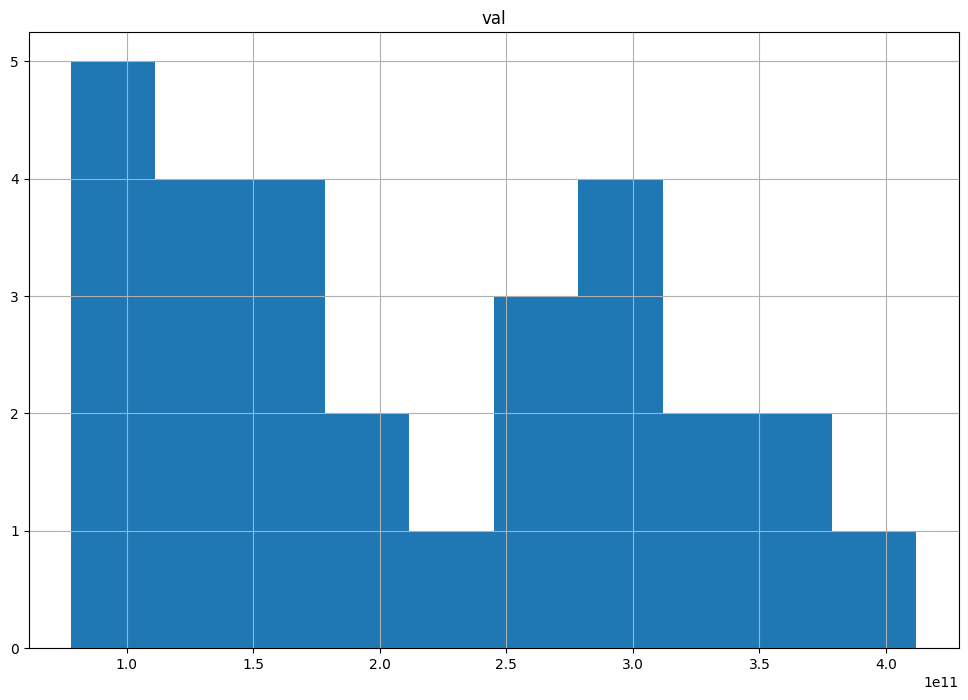

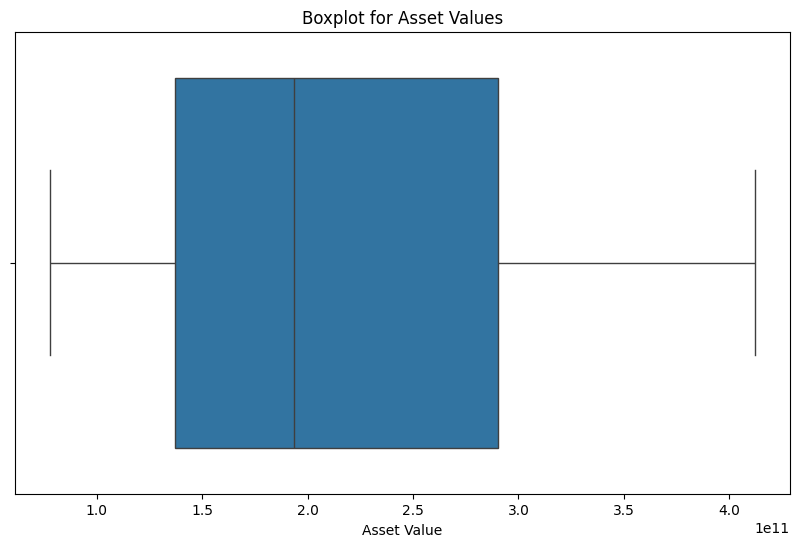

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'assets10K' is your DataFrame

# Select columns for statistical analysis, excluding 'fy'
# Replace 'other_column1', 'other_column2', etc., with the actual column names you want to include
selected_columns = assets10K[['val']]  # Add all other relevant columns here

# Perform statistical summaries on selected columns
stats_summary = selected_columns.describe()
print("Statistical Summary:\n", stats_summary)

# Calculate mean, median, mode for selected columns
mean_values = selected_columns.mean()
median_values = selected_columns.median()
mode_values = selected_columns.mode().iloc[0]

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)

# Visualization - Histograms for distribution of selected columns
selected_columns.hist(figsize=(12, 8))
plt.show()

# Boxplot for a specific column (e.g., 'val')
# Ensure 'val' is in your selected_columns
plt.figure(figsize=(10, 6))
sns.boxplot(x=selected_columns['val'])
plt.title('Boxplot for Asset Values')
plt.xlabel('Asset Value')
plt.show()


**Visualization plot For Asset Data showcasing financial value of Microsoft over tim**e

In [ ]:
import plotly.express as px

# Assuming assets10K is your DataFrame with 'fy' and 'val' columns

# Create an interactive line plot with Plotly
fig = px.line(assets10K, x='fy', y='val', markers=True,
              title='Financial Value of Microsoft over Time',
              labels={'fy': 'Fiscal Year', 'val': 'Asset Value'})

# Update y-axis format to display as dollars
fig.update_layout(yaxis_tickformat='$,.0f')

# Remove grid lines
fig.update_layout(
    xaxis_showgrid=False,  # No grid lines for x-axis
    yaxis_showgrid=False   # No grid lines for y-axis
)

fig.show()


**Get Liabilities Data for Microsoft Company**

In [ ]:
companyConcept = requests.get(
    (
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}'
     f'/us-gaap/Liabilities.json'
    ),
    headers=headers
    )

# review data
companyConcept.json().keys()
companyConcept.json()['units']


{'USD': [{'end': '2010-06-30',
   'val': 39938000000,
   'accn': '0001193125-10-239825',
   'fy': 2011,
   'fp': 'Q1',
   'form': '10-Q',
   'filed': '2010-10-28'},
  {'end': '2010-06-30',
   'val': 39938000000,
   'accn': '0001193125-11-015947',
   'fy': 2011,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2011-01-27'},
  {'end': '2010-06-30',
   'val': 39938000000,
   'accn': '0001193125-11-115186',
   'fy': 2011,
   'fp': 'Q3',
   'form': '10-Q',
   'filed': '2011-04-28'},
  {'end': '2010-06-30',
   'val': 39938000000,
   'accn': '0001193125-11-200680',
   'fy': 2011,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2011-07-28',
   'frame': 'CY2010Q2I'},
  {'end': '2010-09-30',
   'val': 44598000000,
   'accn': '0001193125-10-239825',
   'fy': 2011,
   'fp': 'Q1',
   'form': '10-Q',
   'filed': '2010-10-28',
   'frame': 'CY2010Q3I'},
  {'end': '2010-12-31',
   'val': 43825000000,
   'accn': '0001193125-11-015947',
   'fy': 2011,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2011-01-2

In [ ]:
companyConcept.json()['units']
companyConcept.json()['units'].keys()
companyConcept.json()['units']['USD']
companyConcept.json()['units']['USD'][0]

# parse assets from single filing
companyConcept.json()['units']['USD'][0]['val']

LiabilitiesData = pd.DataFrame.from_dict((
               companyConcept.json()['units']))
LiabilitiesData

,USD
0,"{'end': '2010-06-30', 'val': 39938000000, 'acc..."
1,"{'end': '2010-06-30', 'val': 39938000000, 'acc..."
2,"{'end': '2010-06-30', 'val': 39938000000, 'acc..."
3,"{'end': '2010-06-30', 'val': 39938000000, 'acc..."
4,"{'end': '2010-09-30', 'val': 44598000000, 'acc..."
...,...
107,"{'end': '2023-06-30', 'val': 205753000000, 'ac..."
108,"{'end': '2023-06-30', 'val': 205753000000, 'ac..."
109,"{'end': '2023-06-30', 'val': 205753000000, 'ac..."
110,"{'end': '2023-09-30', 'val': 225071000000, 'ac..."


In [ ]:
# get all filings data
LiabilitiesData = pd.DataFrame.from_dict((
               companyConcept.json()['units']['USD']))

# review data
LiabilitiesData.columns
LiabilitiesData.form
LiabilitiesData10K = LiabilitiesData[LiabilitiesData.form == '10-K']
LiabilitiesData10K.dropna()

,end,val,accn,fy,fp,form,filed,frame
3,2010-06-30,39938000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2010Q2I
11,2011-06-30,51621000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,CY2011Q2I
29,2013-06-30,63487000000,0001193125-14-289961,2014,FY,10-K,2014-07-31,CY2013Q2I
47,2015-06-30,94389000000,0001193125-16-662209,2016,FY,10-K,2016-07-28,CY2015Q2I
55,2016-06-30,121471000000,0001564590-17-014900,2017,FY,10-K,2017-08-02,CY2016Q2I
63,2017-06-30,162601000000,0001564590-18-019062,2018,FY,10-K,2018-08-03,CY2017Q2I
71,2018-06-30,176130000000,0001564590-19-027952,2019,FY,10-K,2019-08-01,CY2018Q2I
79,2019-06-30,184226000000,0001564590-20-034944,2020,FY,10-K,2020-07-31,CY2019Q2I
87,2020-06-30,183007000000,0001564590-21-039151,2021,FY,10-K,2021-07-29,CY2020Q2I
95,2021-06-30,191791000000,0001564590-22-026876,2022,FY,10-K,2022-07-28,CY2021Q2I


**Exploratary Data Analysis for Microsoft Liability Data**

Statistical Summary:
                 val
count  2.600000e+01
mean   1.301083e+11
std    5.952918e+10
min    3.993800e+10
25%    6.826525e+10
50%    1.421490e+11
75%    1.839212e+11
max    2.057530e+11
Mean Values:
 val    1.301083e+11
dtype: float64
Median Values:
 val    1.421490e+11
dtype: float64
Mode Values:
 val    51621000000
Name: 0, dtype: int64


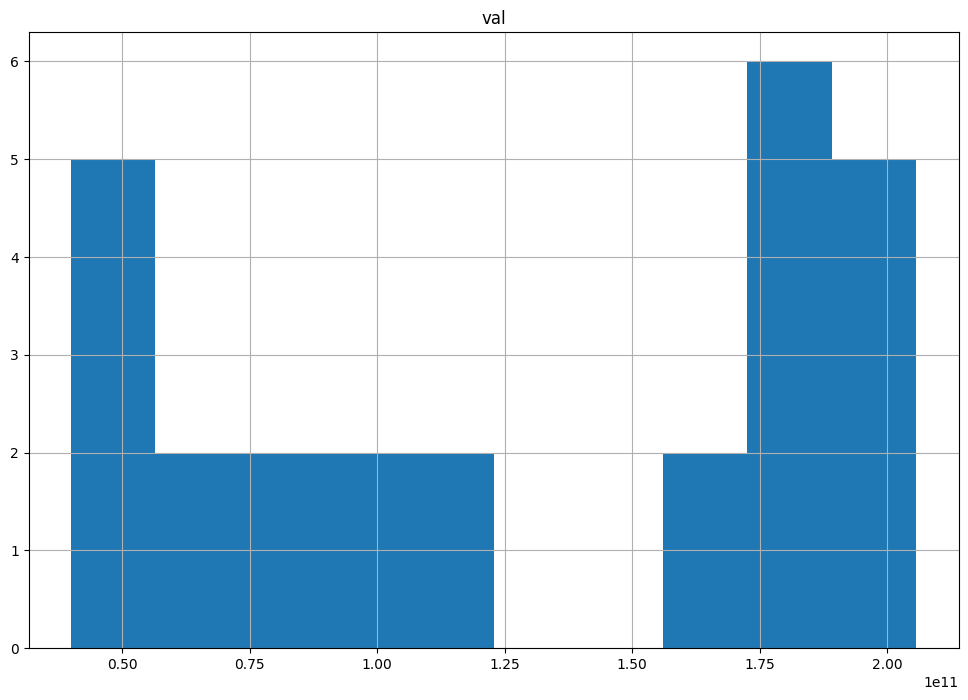

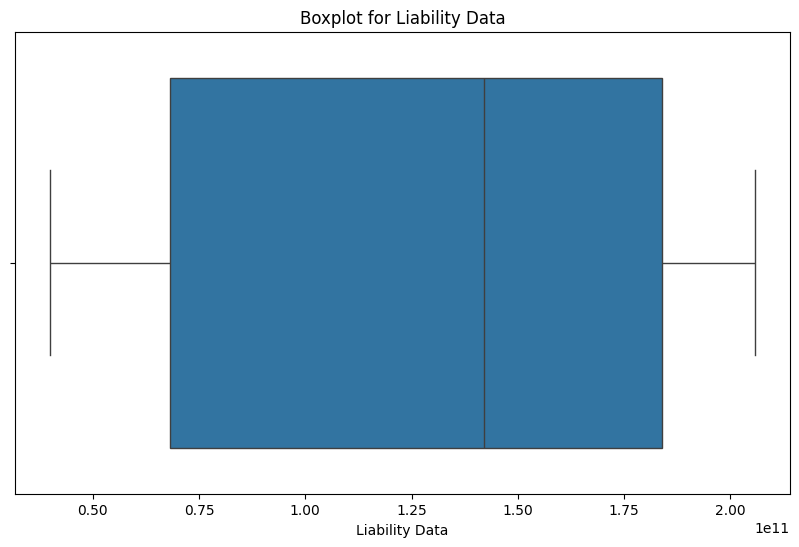

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'LiabilitiesData10K' is your DataFrame

# Select columns for statistical analysis, excluding 'fy'
# Replace 'other_column1', 'other_column2', etc., with the actual column names you want to include
selected_columns = LiabilitiesData10K[['val']]  # Add all other relevant columns here

# Perform statistical summaries on selected columns
stats_summary = selected_columns.describe()
print("Statistical Summary:\n", stats_summary)

# Calculate mean, median, mode for selected columns
mean_values = selected_columns.mean()
median_values = selected_columns.median()
mode_values = selected_columns.mode().iloc[0]

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)

# Visualization - Histograms for distribution of selected columns
selected_columns.hist(figsize=(12, 8))
plt.show()

# Boxplot for a specific column (e.g., 'val')
# Ensure 'val' is in your selected_columns
plt.figure(figsize=(10, 6))
sns.boxplot(x=selected_columns['val'])
plt.title('Boxplot for Liability Data')
plt.xlabel('Liability Data')
plt.show()


**Line graph depicting Liability of Microsoft over period of time**

In [ ]:
import plotly.express as px



# Create an interactive line plot with Plotly
fig = px.line(LiabilitiesData10K, x='fy', y='val', markers=True,
              title='Liability of Microsoft over Time',
              labels={'fy': 'Fiscal Year', 'val': 'Liability'})

# Update y-axis format to display as billions with 'B' and no decimals
fig.update_layout(yaxis_tickformat='$,.0f')

# Remove grid lines
fig.update_layout(
    xaxis_showgrid=False,  # No grid lines for x-axis
    yaxis_showgrid=False   # No grid lines for y-axis
)

fig.show()

**Merging Microsft's asset and Liability data**

In [ ]:
merged_df=pd.merge(LiabilitiesData10K,assets10K, on='accn')

In [ ]:
print(merged_df)

         end_x         val_x                  accn  fy_x fp_x form_x  \
0   2010-06-30   39938000000  0001193125-11-200680  2011   FY   10-K   
1   2010-06-30   39938000000  0001193125-11-200680  2011   FY   10-K   
2   2011-06-30   51621000000  0001193125-11-200680  2011   FY   10-K   
3   2011-06-30   51621000000  0001193125-11-200680  2011   FY   10-K   
4   2011-06-30   51621000000  0001193125-12-316848  2012   FY   10-K   
5   2011-06-30   51621000000  0001193125-12-316848  2012   FY   10-K   
6   2012-06-30   54908000000  0001193125-12-316848  2012   FY   10-K   
7   2012-06-30   54908000000  0001193125-12-316848  2012   FY   10-K   
8   2012-06-30   54908000000  0001193125-13-310206  2013   FY   10-K   
9   2012-06-30   54908000000  0001193125-13-310206  2013   FY   10-K   
10  2013-06-30   63487000000  0001193125-13-310206  2013   FY   10-K   
11  2013-06-30   63487000000  0001193125-13-310206  2013   FY   10-K   
12  2013-06-30   63487000000  0001193125-14-289961  2014   FY   

In [ ]:
merged_df=merged_df.drop(merged_df.columns[11:], axis=1)

In [ ]:
print(merged_df)

         end_x         val_x                  accn  fy_x fp_x form_x  \
0   2010-06-30   39938000000  0001193125-11-200680  2011   FY   10-K   
1   2010-06-30   39938000000  0001193125-11-200680  2011   FY   10-K   
2   2011-06-30   51621000000  0001193125-11-200680  2011   FY   10-K   
3   2011-06-30   51621000000  0001193125-11-200680  2011   FY   10-K   
4   2011-06-30   51621000000  0001193125-12-316848  2012   FY   10-K   
5   2011-06-30   51621000000  0001193125-12-316848  2012   FY   10-K   
6   2012-06-30   54908000000  0001193125-12-316848  2012   FY   10-K   
7   2012-06-30   54908000000  0001193125-12-316848  2012   FY   10-K   
8   2012-06-30   54908000000  0001193125-13-310206  2013   FY   10-K   
9   2012-06-30   54908000000  0001193125-13-310206  2013   FY   10-K   
10  2013-06-30   63487000000  0001193125-13-310206  2013   FY   10-K   
11  2013-06-30   63487000000  0001193125-13-310206  2013   FY   10-K   
12  2013-06-30   63487000000  0001193125-14-289961  2014   FY   

#**Calculating Debt Ratio for Microsoft**

In [ ]:
merged_df['debt_ratio'] = merged_df['val_x']/merged_df['val_y']

In [ ]:
print(merged_df.dropna())


         end_x         val_x                  accn  fy_x fp_x form_x  \
0   2010-06-30   39938000000  0001193125-11-200680  2011   FY   10-K   
1   2010-06-30   39938000000  0001193125-11-200680  2011   FY   10-K   
4   2011-06-30   51621000000  0001193125-12-316848  2012   FY   10-K   
5   2011-06-30   51621000000  0001193125-12-316848  2012   FY   10-K   
12  2013-06-30   63487000000  0001193125-14-289961  2014   FY   10-K   
13  2013-06-30   63487000000  0001193125-14-289961  2014   FY   10-K   
20  2015-06-30   94389000000  0001193125-16-662209  2016   FY   10-K   
21  2015-06-30   94389000000  0001193125-16-662209  2016   FY   10-K   
24  2016-06-30  121471000000  0001564590-17-014900  2017   FY   10-K   
25  2016-06-30  121471000000  0001564590-17-014900  2017   FY   10-K   
28  2017-06-30  162601000000  0001564590-18-019062  2018   FY   10-K   
29  2017-06-30  162601000000  0001564590-18-019062  2018   FY   10-K   
32  2018-06-30  176130000000  0001564590-19-027952  2019   FY   

**Exploratory Data Analysis for Microsft's Merged Data for Asset and Liabilties**

Statistical Summary for Microsoft:
               val_x         fy_x         val_y         fy_y  debt_ratio
count  5.200000e+01    52.000000  5.200000e+01    52.000000   52.000000
mean   1.301083e+11  2017.000000  2.272151e+11  2017.000000    0.558808
std    5.894267e+10     3.778162  9.160054e+10     3.778162    0.100137
min    3.993800e+10  2011.000000  8.611300e+10  2011.000000    0.367401
25%    6.348700e+10  2014.000000  1.424310e+11  2014.000000    0.479163
50%    1.421490e+11  2017.000000  2.173900e+11  2017.000000    0.552998
75%    1.842260e+11  2020.000000  3.013110e+11  2020.000000    0.628203
max    2.057530e+11  2023.000000  4.119760e+11  2023.000000    0.871937
Mean Values:
 val_x         1.301083e+11
fy_x          2.017000e+03
val_y         2.272151e+11
fy_y          2.017000e+03
debt_ratio    5.588083e-01
dtype: float64
Median Values:
 val_x         1.421490e+11
fy_x          2.017000e+03
val_y         2.173900e+11
fy_y          2.017000e+03
debt_ratio    5.529982e-01
d

<ipython-input-47-284f48fbb84b>:11: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-47-284f48fbb84b>:12: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



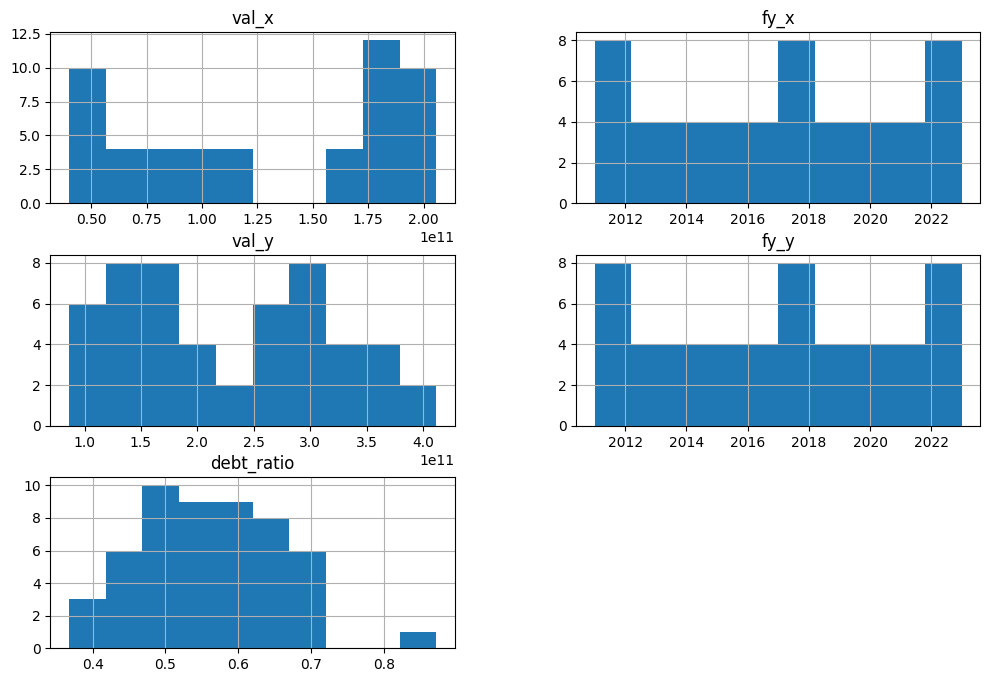

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming assetsData is your DataFrame with financial data

# Perform statistical summaries
stats_summary = merged_df.describe()
print("Statistical Summary for Microsoft:\n", stats_summary)

# Calculate mean, median, mode
mean_values = merged_df.mean()
median_values = merged_df.median()
mode_values = merged_df.mode().iloc[0]

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)

# Visualization - Histograms for distribution
merged_df.hist(figsize=(12, 8))
plt.show()

Visualization for Microsft Debt Ratio over period of time

In [ ]:
import matplotlib.pyplot as plt

fig = px.line(merged_df, x='fy_x', y='debt_ratio', title='Debt Ratio Over Time for Microsoft', markers=True)
fig.update_traces(line_color='blue')
fig.update_xaxes(title='Fiscal Year')
fig.update_yaxes(title='Debt Ratio')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


In [ ]:
merged_df = merged_df.rename(columns={'val_x': 'Liabilities', 'val_y': 'Assets'})

In [ ]:
merged_df

,end_x,val_x,accn,fy_x,fp_x,form_x,filed_x,frame_x,end_y,val_y,fy_y,debt_ratio
0,2010-06-30,39938000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2010Q2I,2010-06-30,86113000000,2011,0.463786
1,2010-06-30,39938000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2010Q2I,2011-06-30,108704000000,2011,0.367401
2,2011-06-30,51621000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,NaN,2010-06-30,86113000000,2011,0.599457
3,2011-06-30,51621000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,NaN,2011-06-30,108704000000,2011,0.474877
4,2011-06-30,51621000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,CY2011Q2I,2011-06-30,108704000000,2012,0.474877
5,2011-06-30,51621000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,CY2011Q2I,2012-06-30,121271000000,2012,0.425666
6,2012-06-30,54908000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,NaN,2011-06-30,108704000000,2012,0.505115
7,2012-06-30,54908000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,NaN,2012-06-30,121271000000,2012,0.452771
8,2012-06-30,54908000000,0001193125-13-310206,2013,FY,10-K,2013-07-30,NaN,2012-06-30,121271000000,2013,0.452771
9,2012-06-30,54908000000,0001193125-13-310206,2013,FY,10-K,2013-07-30,NaN,2013-06-30,142431000000,2013,0.385506


**HeatMap Correlation for Microsoft's Debt Ratio**

    debt_ratio   Liabilities        Assets
0     0.463786   39938000000   86113000000
1     0.367401   39938000000  108704000000
2     0.599457   51621000000   86113000000
3     0.474877   51621000000  108704000000
4     0.474877   51621000000  108704000000
5     0.425666   51621000000  121271000000
6     0.505115   54908000000  108704000000
7     0.452771   54908000000  121271000000
8     0.452771   54908000000  121271000000
9     0.385506   54908000000  142431000000
10    0.523513   63487000000  121271000000
11    0.445739   63487000000  142431000000
12    0.445739   63487000000  142431000000
13    0.368288   63487000000  172384000000
14    0.579930   82600000000  142431000000
15    0.479163   82600000000  172384000000
16    0.479163   82600000000  172384000000
17    0.468724   82600000000  176223000000
18    0.557708   96140000000  172384000000
19    0.545559   96140000000  176223000000
20    0.540998   94389000000  174472000000
21    0.487310   94389000000  193694000000
22    0.697

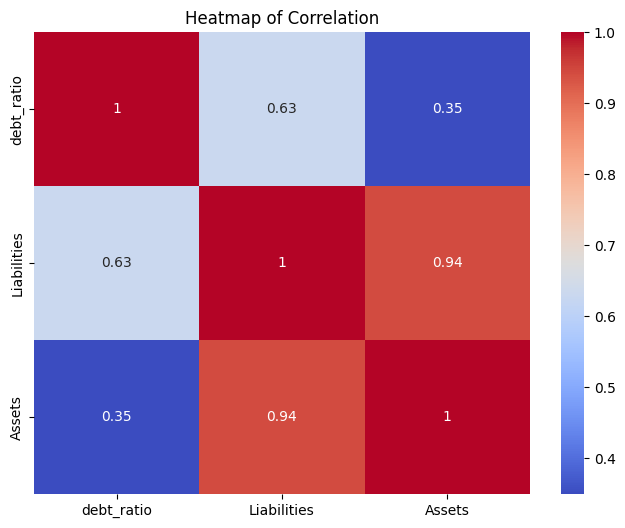

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
heatmap_df= merged_df[['debt_ratio','Liabilities','Assets']]
print(heatmap_df)
corr= heatmap_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation')
plt.show()

**Bar graph showing Debit Ratio over fiscal years**

In [ ]:
import plotly.express as px

# Assuming 'merged_df' is a pandas DataFrame that has been provided and contains the columns 'fy_x' for fiscal year and 'debt_ratio' for the debt ratio values.

# Group by fiscal year and calculate the mean debt ratio
grouped_df = merged_df.groupby('fy_x')['debt_ratio'].mean().reset_index()

# Convert the mean debt ratio to percentage values for plotting
grouped_df['debt_ratio_pct'] = grouped_df['debt_ratio'] * 100

# Create a bar chart
fig = px.bar(grouped_df, x='fy_x', y='debt_ratio_pct',
             title="Average Debt Ratio Over Fiscal Years",
             labels={'fy_x': 'Fiscal Year', 'debt_ratio_pct': 'Average Debt Ratio (%)'},
             text='debt_ratio_pct')  # Add the mean debt ratio as text on the bar

# Set y-axis to range from 0% to 100% and format as percentages
fig.update_yaxes(range=[0, 100], tickvals=list(range(0, 110, 10)), ticktext=[f'{x}%' for x in range(0, 110, 10)])

# Display percentage on the bar labels only
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
# Remove grid lines for a cleaner look
fig.update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    plot_bgcolor="white"  # Set background color to white
)

# Display percentage on the bar labels only
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Show the figure
fig.show()


**Line graph depicting Assets and liabilities over time**

In [ ]:
import plotly.graph_objects as go

# Plotting the graph
fig = go.Figure()

# Adding Liabilities plot
fig.add_trace(go.Scatter(
    x=merged_df['filed_x'],
    y=merged_df['Liabilities'],
    mode='lines+markers',
    name='Liabilities',
    line=dict(color='red'),
    marker=dict(symbol='circle')
))

# Adding Revenues plot
fig.add_trace(go.Scatter(
    x=merged_df['filed_x'],
    y=merged_df['Assets'],
    mode='lines+markers',
    name='Assets',
    line=dict(color='blue'),
    marker=dict(symbol='circle')
))

# Updating layout to remove grid lines
fig.update_layout(
    title='Microsoft Liabilities and Assets Over Time',
    xaxis_title='Fiscal Years',
    yaxis_title='Financial Values',
    legend_title='Legend',
    xaxis=dict(
        tickangle=45,
        showgrid=False  # Do not show x-axis grid lines
    ),
    yaxis=dict(
        showgrid=False  # Do not show y-axis grid lines
    )
)

fig.show()


**Stock Price Data Integration using YFinance**

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

# Assuming your dataset is already loaded into merged_df
# Ensure the 'filingDate' column is in datetime format
merged_df['filingDate'] = pd.to_datetime(merged_df['filed_x'])

# Setting stock price to 0
merged_df['stock_price'] = 0

# Getting stock price with respect to filing Date for all filings
for index, row in merged_df.iterrows():
    # Use the 'filed' date from the DataFrame for each row
    filing_date = row['filingDate']
    ticker_symbol = companyData['ticker'][0]

    # Setting 7 days prior to Filing date
    start_date = filing_date - timedelta(days=7)
    end_date = start_date + timedelta(days=7)

    # Correctly add 7 days to the filing Date

    # Now, convert both start_date and end_date to strings for further processing
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')

    #creating a y finance ticker object
    ticker = yf.Ticker(ticker_symbol)

    historical_data = ticker.history(period='1d', start=start_date_str, end=end_date_str)
    specific_data = historical_data.iloc[0]['Close']

    # Assigning stock price to the respective row
    merged_df.at[index, 'stock_price'] = specific_data

    print(specific_data)

print(merged_df)





21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
24.65383529663086
24.65383529663086
24.65383529663086
24.65383529663086
26.35774040222168
26.35774040222168
26.35774040222168
26.35774040222168
37.86338424682617
37.86338424682617
37.86338424682617
37.86338424682617
40.211944580078125
40.211944580078125
40.211944580078125
40.211944580078125
50.200077056884766
50.200077056884766
50.200077056884766
50.200077056884766
68.28494262695312
68.28494262695312
68.28494262695312
68.28494262695312
101.23526763916016
101.23526763916016
101.23526763916016
101.23526763916016
133.93978881835938
133.93978881835938
133.93978881835938
133.93978881835938
194.69183349609375
194.69183349609375
194.69183349609375
194.69183349609375
279.4263610839844
279.4263610839844
279.4263610839844
279.4263610839844
260.7379455566406
260.7379455566406
260.7379455566406
260.7379455566406
344.79840087890625
344.79840087890625
344.79840087890625
344.79840087890625
         end_x   Liabilities        

#**Correlation Analysis for Debt Ratio vs Stock Price**

In [ ]:
import pandas as pd

# Assuming recent_4_filings is your DataFrame and it has 'stock_price' and 'debt_ratio' columns
correlation_matrix = merged_df[['stock_price', 'debt_ratio']].corr()

print(correlation_matrix)

             stock_price  debt_ratio
stock_price     1.000000    0.228009
debt_ratio      0.228009    1.000000


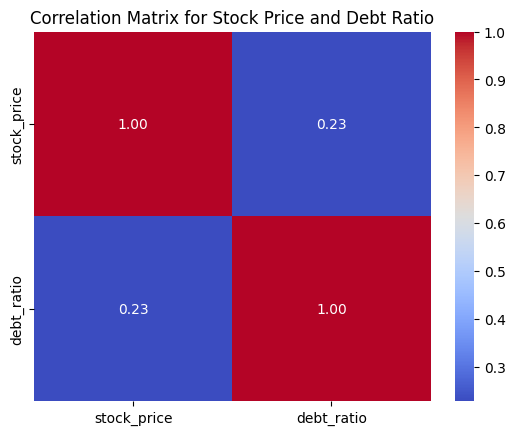

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_matrix is already calculated
# correlation_matrix = recent_4_filings[['stock_price', 'debt_ratio']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Stock Price and Debt Ratio')
plt.show()


**Short and Long-term effects of stock Price and Debt Rtaio over Time**

In [ ]:
import plotly.graph_objects as go

# Assuming `merged_df` is a DataFrame and it has 'filingDate', 'debt_ratio', and 'stock_price' columns.

# Create the figure with stock price and debt ratio traces
fig = go.Figure()

# Add Stock Price trace
fig.add_trace(go.Scatter(
    x=merged_df['filingDate'],
    y=merged_df['stock_price'],
    name='Stock Price',
    yaxis='y2'  # This specifies that this trace should use the secondary y-axis
))

# Add Debt Ratio trace
fig.add_trace(go.Scatter(
    x=merged_df['filingDate'],
    y=merged_df['debt_ratio'],
    name='Debt Ratio'
))

# Update layout with no grid lines and add titles
fig.update_layout(
    xaxis=dict(
        title='Fiscal Years',
        showgrid=False  # Removes x-axis grid lines
    ),
    yaxis=dict(
        title='Debt Ratio',
        showgrid=False  # Removes y-axis grid lines for the primary y-axis
    ),
    yaxis2=dict(
        title='Stock Price',
        overlaying='y',
        side='right',
        showgrid=False  # Removes y-axis grid lines for the secondary y-axis
    ),
    title='Debt Ratio and Stock Price over Time'
)

# Show the figure
fig.show()


**Get Microsoft's Current Asset Data**

In [ ]:
# get company concept data
companyConcept = requests.get(
    (
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}'
     f'/us-gaap/AssetsCurrent.json'
    ),
    headers=headers
    )

# review data
companyConcept.json().keys()
companyConcept.json()['units']

{'USD': [{'end': '2009-06-30',
   'val': 49280000000,
   'accn': '0001193125-09-212454',
   'fy': 2010,
   'fp': 'Q1',
   'form': '10-Q',
   'filed': '2009-10-23'},
  {'end': '2009-06-30',
   'val': 49280000000,
   'accn': '0001193125-10-015598',
   'fy': 2010,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2010-01-28'},
  {'end': '2009-06-30',
   'val': 49280000000,
   'accn': '0001193125-10-090116',
   'fy': 2010,
   'fp': 'Q3',
   'form': '10-Q',
   'filed': '2010-04-22'},
  {'end': '2009-06-30',
   'val': 49280000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-07-30',
   'frame': 'CY2009Q2I'},
  {'end': '2009-09-30',
   'val': 52231000000,
   'accn': '0001193125-09-212454',
   'fy': 2010,
   'fp': 'Q1',
   'form': '10-Q',
   'filed': '2009-10-23',
   'frame': 'CY2009Q3I'},
  {'end': '2009-12-31',
   'val': 52487000000,
   'accn': '0001193125-10-015598',
   'fy': 2010,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2010-01-2

In [ ]:
companyConcept.json()['units']
companyConcept.json()['units'].keys()
companyConcept.json()['units']['USD']
companyConcept.json()['units']['USD'][0]

# parse assets from single filing
companyConcept.json()['units']['USD'][0]['val']

CurrentassetsData = pd.DataFrame.from_dict((
               companyConcept.json()['units']))
CurrentassetsData

,USD
0,"{'end': '2009-06-30', 'val': 49280000000, 'acc..."
1,"{'end': '2009-06-30', 'val': 49280000000, 'acc..."
2,"{'end': '2009-06-30', 'val': 49280000000, 'acc..."
3,"{'end': '2009-06-30', 'val': 49280000000, 'acc..."
4,"{'end': '2009-09-30', 'val': 52231000000, 'acc..."
...,...
115,"{'end': '2023-06-30', 'val': 184257000000, 'ac..."
116,"{'end': '2023-06-30', 'val': 184257000000, 'ac..."
117,"{'end': '2023-06-30', 'val': 184257000000, 'ac..."
118,"{'end': '2023-09-30', 'val': 207586000000, 'ac..."


In [ ]:
# get all filings data
CurrentassetsData = pd.DataFrame.from_dict((
               companyConcept.json()['units']['USD']))

# review data
CurrentassetsData.columns
CurrentassetsData.form
CurrentassetsData10K = CurrentassetsData[CurrentassetsData.form == '10-K']
CurrentassetsData10K.dropna()


,end,val,accn,fy,fp,form,filed,frame
3,2009-06-30,49280000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q2I
11,2010-06-30,55676000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2010Q2I
19,2011-06-30,74918000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,CY2011Q2I
37,2013-06-30,101466000000,0001193125-14-289961,2014,FY,10-K,2014-07-31,CY2013Q2I
55,2015-06-30,122797000000,0001193125-16-662209,2016,FY,10-K,2016-07-28,CY2015Q2I
63,2016-06-30,139660000000,0001564590-17-014900,2017,FY,10-K,2017-08-02,CY2016Q2I
71,2017-06-30,162696000000,0001564590-18-019062,2018,FY,10-K,2018-08-03,CY2017Q2I
79,2018-06-30,169662000000,0001564590-19-027952,2019,FY,10-K,2019-08-01,CY2018Q2I
87,2019-06-30,175552000000,0001564590-20-034944,2020,FY,10-K,2020-07-31,CY2019Q2I
95,2020-06-30,181915000000,0001564590-21-039151,2021,FY,10-K,2021-07-29,CY2020Q2I


**Microsoft's Exploratory Data Analysis for Current Asset Data**

Statistical Summary for Microsoft:
                 val           fy
count  2.800000e+01    28.000000
mean   1.324332e+11  2016.500000
std    4.576602e+10     4.105101
min    4.928000e+10  2010.000000
25%    9.737050e+10  2013.000000
50%    1.396600e+11  2016.500000
75%    1.711510e+11  2020.000000
max    1.844060e+11  2023.000000
Mean Values:
 val    1.324332e+11
fy     2.016500e+03
dtype: float64
Median Values:
 val    1.396600e+11
fy     2.016500e+03
dtype: float64
Mode Values:
 end                2010-06-30
val             55676000000.0
accn     0000950170-23-035122
fy                       2010
fp                         FY
form                     10-K
filed              2010-07-30
frame               CY2009Q2I
Name: 0, dtype: object


<ipython-input-66-570cba158a61>:11: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-66-570cba158a61>:12: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



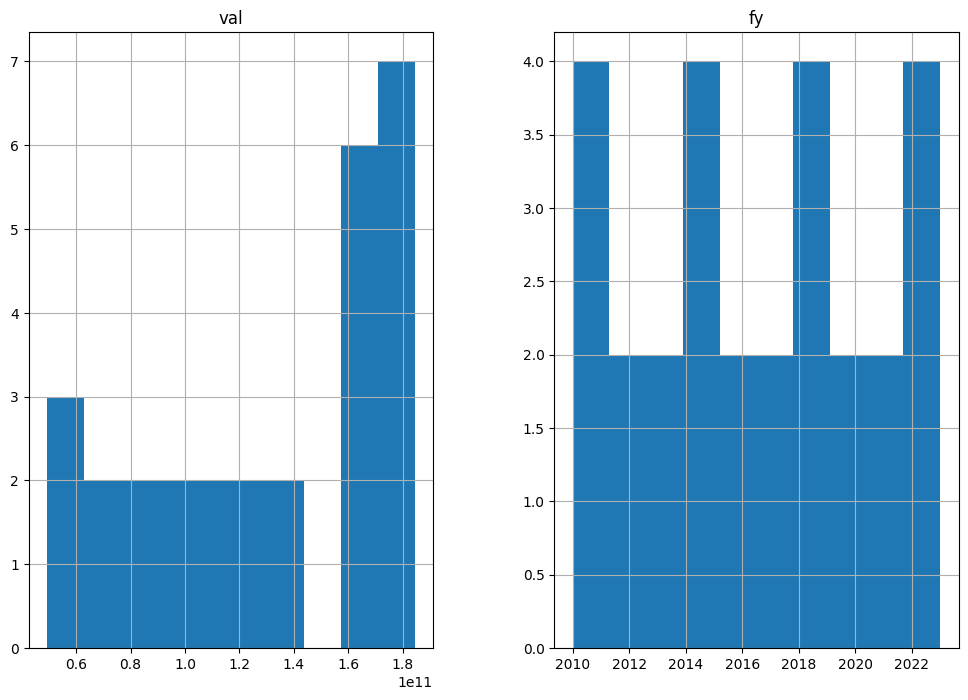

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming assetsData is your DataFrame with financial data

# Perform statistical summaries
stats_summary = CurrentassetsData10K.describe()
print("Statistical Summary for Microsoft:\n", stats_summary)

# Calculate mean, median, mode
mean_values = CurrentassetsData10K.mean()
median_values = CurrentassetsData10K.median()
mode_values = CurrentassetsData10K.mode().iloc[0]

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)

# Visualization - Histograms for distribution
CurrentassetsData10K.hist(figsize=(12, 8))
plt.show()

**Line Graph showing Current Asset Value of Microsoft over Time**

In [ ]:
import plotly.graph_objects as go

# Plotting the graph
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=CurrentassetsData10K['end'],
    y=CurrentassetsData10K['val'],
    mode='lines+markers',
    marker=dict(symbol='circle'),
    line=dict(color='blue')
))

fig.update_layout(
    title='Current Asset Value of Microsoft over Time',
    xaxis_title='Fiscal Years',
    yaxis_title='Value in $',
    xaxis=dict(
        tickangle=45,
        showgrid=False  # No grid lines for x-axis
    ),
    yaxis=dict(
        showgrid=False  # No grid lines for y-axis
    ),
    showlegend=False
)

fig.show()



#**Get Microsoft's Liabilties Current Data**

In [ ]:
# get company concept data
companyConcept = requests.get(
    (
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}'
     f'/us-gaap/LiabilitiesCurrent.json'
    ),
    headers=headers
    )

# review data
companyConcept.json().keys()
companyConcept.json()['units']

{'USD': [{'end': '2009-06-30',
   'val': 27034000000,
   'accn': '0001193125-09-212454',
   'fy': 2010,
   'fp': 'Q1',
   'form': '10-Q',
   'filed': '2009-10-23'},
  {'end': '2009-06-30',
   'val': 27034000000,
   'accn': '0001193125-10-015598',
   'fy': 2010,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2010-01-28'},
  {'end': '2009-06-30',
   'val': 27034000000,
   'accn': '0001193125-10-090116',
   'fy': 2010,
   'fp': 'Q3',
   'form': '10-Q',
   'filed': '2010-04-22'},
  {'end': '2009-06-30',
   'val': 27034000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-07-30',
   'frame': 'CY2009Q2I'},
  {'end': '2009-09-30',
   'val': 28761000000,
   'accn': '0001193125-09-212454',
   'fy': 2010,
   'fp': 'Q1',
   'form': '10-Q',
   'filed': '2009-10-23',
   'frame': 'CY2009Q3I'},
  {'end': '2009-12-31',
   'val': 25715000000,
   'accn': '0001193125-10-015598',
   'fy': 2010,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2010-01-2

In [ ]:
companyConcept.json()['units']
companyConcept.json()['units'].keys()
companyConcept.json()['units']['USD']
companyConcept.json()['units']['USD'][0]

# parse assets from single filing
companyConcept.json()['units']['USD'][0]['val']

CurrentLiabilitiesData = pd.DataFrame.from_dict((
               companyConcept.json()['units']))
CurrentLiabilitiesData

,USD
0,"{'end': '2009-06-30', 'val': 27034000000, 'acc..."
1,"{'end': '2009-06-30', 'val': 27034000000, 'acc..."
2,"{'end': '2009-06-30', 'val': 27034000000, 'acc..."
3,"{'end': '2009-06-30', 'val': 27034000000, 'acc..."
4,"{'end': '2009-09-30', 'val': 28761000000, 'acc..."
...,...
115,"{'end': '2023-06-30', 'val': 104149000000, 'ac..."
116,"{'end': '2023-06-30', 'val': 104149000000, 'ac..."
117,"{'end': '2023-06-30', 'val': 104149000000, 'ac..."
118,"{'end': '2023-09-30', 'val': 124792000000, 'ac..."


In [ ]:
# get all filings data
CurrentLiabilitiesData = pd.DataFrame.from_dict((
               companyConcept.json()['units']['USD']))

# review data
CurrentLiabilitiesData.columns
CurrentLiabilitiesData.form
CurrentLiabilitiesData10K = CurrentLiabilitiesData[CurrentLiabilitiesData.form == '10-K']
CurrentLiabilitiesData10K.dropna()


,end,val,accn,fy,fp,form,filed,frame
3,2009-06-30,27034000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q2I
11,2010-06-30,26147000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2010Q2I
19,2011-06-30,28774000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,CY2011Q2I
37,2013-06-30,37417000000,0001193125-14-289961,2014,FY,10-K,2014-07-31,CY2013Q2I
55,2015-06-30,49647000000,0001193125-16-662209,2016,FY,10-K,2016-07-28,CY2015Q2I
63,2016-06-30,59357000000,0001564590-17-014900,2017,FY,10-K,2017-08-02,CY2016Q2I
71,2017-06-30,55745000000,0001564590-18-019062,2018,FY,10-K,2018-08-03,CY2017Q2I
79,2018-06-30,58488000000,0001564590-19-027952,2019,FY,10-K,2019-08-01,CY2018Q2I
87,2019-06-30,69420000000,0001564590-20-034944,2020,FY,10-K,2020-07-31,CY2019Q2I
95,2020-06-30,72310000000,0001564590-21-039151,2021,FY,10-K,2021-07-29,CY2020Q2I


**Microsoft's Exploratory Data Analysis for Current Liabilities Dataset**

Statistical Summary for Microsoft:
 count    2.800000e+01
mean     5.638893e+10
std      2.331478e+10
min      2.614700e+10
25%      3.623475e+10
50%      5.711650e+10
75%      7.014250e+10
max      1.041490e+11
Name: val, dtype: float64
Mean Value:
 56388928571.42857
Median Value:
 57116500000.0
Mode Value:
 26147000000


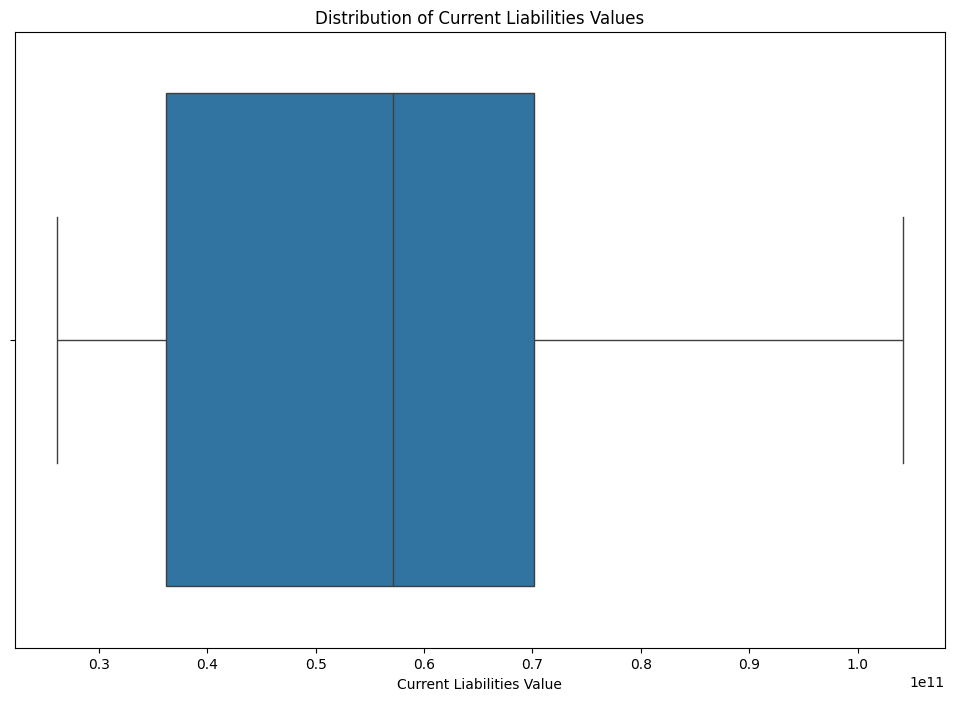

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming CurrentLiabilitiesData10K is your DataFrame and 'val' is a column in it

# Perform statistical summaries for 'val' column
stats_summary = CurrentLiabilitiesData10K['val'].describe()
print("Statistical Summary for Microsoft:\n", stats_summary)

# Calculate mean, median, mode for 'val' column
mean_value = CurrentLiabilitiesData10K['val'].mean()
median_value = CurrentLiabilitiesData10K['val'].median()
mode_value = CurrentLiabilitiesData10K['val'].mode().iloc[0]

print("Mean Value:\n", mean_value)
print("Median Value:\n", median_value)
print("Mode Value:\n", mode_value)

# Visualization - Boxplot for 'val' column
plt.figure(figsize=(12, 8))
sns.boxplot(x=CurrentLiabilitiesData10K['val'])
plt.title('Distribution of Current Liabilities Values')
plt.xlabel('Current Liabilities Value')
plt.show()


**Line Graph for Current Liabilties of Microsoft Over Time**

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming CurrentLiabilitiesData10K is your DataFrame and 'fy' and 'val' are columns in it

# Convert 'val' to dollar format (if you plan to display these formatted values, ensure they're used appropriately)
CurrentLiabilitiesData10K['val_dollar'] = CurrentLiabilitiesData10K['val'].apply(lambda x: f"${x:,.2f}")

# Create an interactive line plot using Plotly
fig = px.line(CurrentLiabilitiesData10K, x='fy', y='val', markers=True, title='Current Liabilities of Microsoft over Time')
fig.update_layout(
    xaxis_title='Period of Time',
    yaxis_title='Value in $',
    xaxis=dict(tickangle=45, showgrid=False),  # Rotate x-axis labels and remove grid lines
    yaxis=dict(showgrid=False)  # Remove grid lines on the y-axis
)

fig.show()


<ipython-input-72-ac4871ac8ca0>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Microsoft's Merged Dataset for Calculating Current Ratio**

In [ ]:
merged_df=pd.merge(CurrentassetsData10K,CurrentLiabilitiesData10K, on='accn')
print(merged_df)

         end_x         val_x                  accn  fy_x fp_x form_x  \
0   2009-06-30   49280000000  0001193125-10-171791  2010   FY   10-K   
1   2009-06-30   49280000000  0001193125-10-171791  2010   FY   10-K   
2   2010-06-30   55676000000  0001193125-10-171791  2010   FY   10-K   
3   2010-06-30   55676000000  0001193125-10-171791  2010   FY   10-K   
4   2010-06-30   55676000000  0001193125-11-200680  2011   FY   10-K   
5   2010-06-30   55676000000  0001193125-11-200680  2011   FY   10-K   
6   2011-06-30   74918000000  0001193125-11-200680  2011   FY   10-K   
7   2011-06-30   74918000000  0001193125-11-200680  2011   FY   10-K   
8   2011-06-30   74918000000  0001193125-12-316848  2012   FY   10-K   
9   2011-06-30   74918000000  0001193125-12-316848  2012   FY   10-K   
10  2012-06-30   85084000000  0001193125-12-316848  2012   FY   10-K   
11  2012-06-30   85084000000  0001193125-12-316848  2012   FY   10-K   
12  2012-06-30   85084000000  0001193125-13-310206  2013   FY   

In [ ]:
merged_df=merged_df.drop(merged_df.columns[11:], axis=1)

In [ ]:
merged_df

,end_x,val_x,accn,fy_x,fp_x,form_x,filed_x,frame_x,end_y,val_y,fy_y
0,2009-06-30,49280000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q2I,2009-06-30,27034000000,2010
1,2009-06-30,49280000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q2I,2010-06-30,26147000000,2010
2,2010-06-30,55676000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,NaN,2009-06-30,27034000000,2010
3,2010-06-30,55676000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,NaN,2010-06-30,26147000000,2010
4,2010-06-30,55676000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2010Q2I,2010-06-30,26147000000,2011
5,2010-06-30,55676000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2010Q2I,2011-06-30,28774000000,2011
6,2011-06-30,74918000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,NaN,2010-06-30,26147000000,2011
7,2011-06-30,74918000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,NaN,2011-06-30,28774000000,2011
8,2011-06-30,74918000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,CY2011Q2I,2011-06-30,28774000000,2012
9,2011-06-30,74918000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,CY2011Q2I,2012-06-30,32688000000,2012


#**Calculating Current Ratio**

In [ ]:
merged_df['Current_Ratio'] = merged_df['val_x']/merged_df['val_y']
print(merged_df)
merged_df.dropna()

         end_x         val_x                  accn  fy_x fp_x form_x  \
0   2009-06-30   49280000000  0001193125-10-171791  2010   FY   10-K   
1   2009-06-30   49280000000  0001193125-10-171791  2010   FY   10-K   
2   2010-06-30   55676000000  0001193125-10-171791  2010   FY   10-K   
3   2010-06-30   55676000000  0001193125-10-171791  2010   FY   10-K   
4   2010-06-30   55676000000  0001193125-11-200680  2011   FY   10-K   
5   2010-06-30   55676000000  0001193125-11-200680  2011   FY   10-K   
6   2011-06-30   74918000000  0001193125-11-200680  2011   FY   10-K   
7   2011-06-30   74918000000  0001193125-11-200680  2011   FY   10-K   
8   2011-06-30   74918000000  0001193125-12-316848  2012   FY   10-K   
9   2011-06-30   74918000000  0001193125-12-316848  2012   FY   10-K   
10  2012-06-30   85084000000  0001193125-12-316848  2012   FY   10-K   
11  2012-06-30   85084000000  0001193125-12-316848  2012   FY   10-K   
12  2012-06-30   85084000000  0001193125-13-310206  2013   FY   

,end_x,val_x,accn,fy_x,fp_x,form_x,filed_x,frame_x,end_y,val_y,fy_y,Current_Ratio
0,2009-06-30,49280000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q2I,2009-06-30,27034000000,2010,1.822890
1,2009-06-30,49280000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q2I,2010-06-30,26147000000,2010,1.884729
4,2010-06-30,55676000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2010Q2I,2010-06-30,26147000000,2011,2.129346
5,2010-06-30,55676000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2010Q2I,2011-06-30,28774000000,2011,1.934941
8,2011-06-30,74918000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,CY2011Q2I,2011-06-30,28774000000,2012,2.603670
9,2011-06-30,74918000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,CY2011Q2I,2012-06-30,32688000000,2012,2.291911
16,2013-06-30,101466000000,0001193125-14-289961,2014,FY,10-K,2014-07-31,CY2013Q2I,2013-06-30,37417000000,2014,2.711762
17,2013-06-30,101466000000,0001193125-14-289961,2014,FY,10-K,2014-07-31,CY2013Q2I,2014-06-30,45625000000,2014,2.223912
24,2015-06-30,122797000000,0001193125-16-662209,2016,FY,10-K,2016-07-28,CY2015Q2I,2015-06-30,49647000000,2016,2.473402
25,2015-06-30,122797000000,0001193125-16-662209,2016,FY,10-K,2016-07-28,CY2015Q2I,2016-06-30,59357000000,2016,2.068787


In [ ]:
merged_df.dropna()


,end_x,val_x,accn,fy_x,fp_x,form_x,filed_x,frame_x,end_y,val_y,fy_y,Current_Ratio
0,2009-06-30,49280000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q2I,2009-06-30,27034000000,2010,1.822890
1,2009-06-30,49280000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q2I,2010-06-30,26147000000,2010,1.884729
4,2010-06-30,55676000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2010Q2I,2010-06-30,26147000000,2011,2.129346
5,2010-06-30,55676000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2010Q2I,2011-06-30,28774000000,2011,1.934941
8,2011-06-30,74918000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,CY2011Q2I,2011-06-30,28774000000,2012,2.603670
9,2011-06-30,74918000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,CY2011Q2I,2012-06-30,32688000000,2012,2.291911
16,2013-06-30,101466000000,0001193125-14-289961,2014,FY,10-K,2014-07-31,CY2013Q2I,2013-06-30,37417000000,2014,2.711762
17,2013-06-30,101466000000,0001193125-14-289961,2014,FY,10-K,2014-07-31,CY2013Q2I,2014-06-30,45625000000,2014,2.223912
24,2015-06-30,122797000000,0001193125-16-662209,2016,FY,10-K,2016-07-28,CY2015Q2I,2015-06-30,49647000000,2016,2.473402
25,2015-06-30,122797000000,0001193125-16-662209,2016,FY,10-K,2016-07-28,CY2015Q2I,2016-06-30,59357000000,2016,2.068787


**Microsoft's Exploratory Analysis for Merged Data for Calculating Current Ratio**

Statistical Summary for Microsoft:
               val_x        fy_x         val_y        fy_y  Current_Ratio
count  5.600000e+01    56.00000  5.600000e+01    56.00000      56.000000
mean   1.324332e+11  2016.50000  5.638893e+10  2016.50000       2.413323
std    4.534806e+10     4.06761  2.310186e+10     4.06761       0.383540
min    4.928000e+10  2010.00000  2.614700e+10  2010.00000       1.629243
25%    9.737050e+10  2013.00000  3.623475e+10  2013.00000       2.079994
50%    1.396600e+11  2016.50000  5.711650e+10  2016.50000       2.489308
75%    1.711510e+11  2020.00000  7.014250e+10  2020.00000       2.697723
max    1.844060e+11  2023.00000  1.041490e+11  2023.00000       3.104075
Mean Values:
 val_x            1.324332e+11
fy_x             2.016500e+03
val_y            5.638893e+10
fy_y             2.016500e+03
Current_Ratio    2.413323e+00
dtype: float64
Median Values:
 val_x            1.396600e+11
fy_x             2.016500e+03
val_y            5.711650e+10
fy_y             2.016

<ipython-input-78-284f48fbb84b>:11: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-78-284f48fbb84b>:12: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



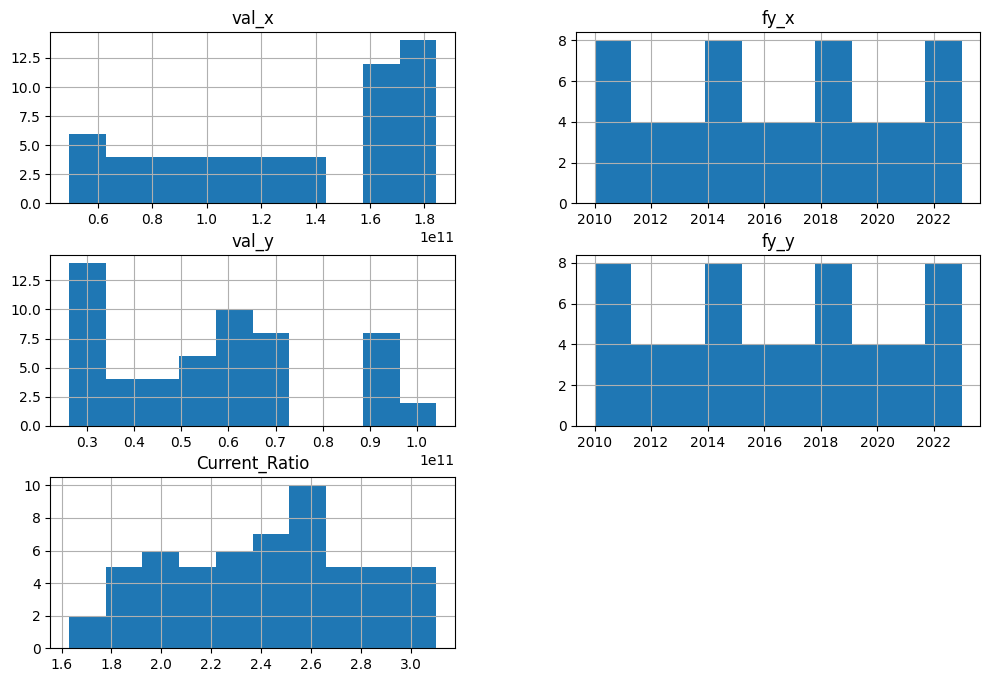

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming assetsData is your DataFrame with financial data

# Perform statistical summaries
stats_summary = merged_df.describe()
print("Statistical Summary for Microsoft:\n", stats_summary)

# Calculate mean, median, mode
mean_values = merged_df.mean()
median_values = merged_df.median()
mode_values = merged_df.mode().iloc[0]

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)

# Visualization - Histograms for distribution
merged_df.hist(figsize=(12, 8))
plt.show()

**Renaming val_x as Current Assets and val_y as Current Liabilities**

In [ ]:
merged_df = merged_df.rename(columns={'val_x': 'Current_Assets', 'val_y': 'Current_Liabilities'})

**Line Graph for Current Assets and Liabilities Over Time**

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming merged_df is your DataFrame and it has been appropriately prepared

# Convert 'end_x' to datetime format
merged_df['end_x'] = pd.to_datetime(merged_df['end_x'])

# Convert DataFrame to long format for easier plotting with Plotly
long_df = pd.melt(merged_df, id_vars=['end_x'], value_vars=['Current_Assets', 'Current_Liabilities'],
                  var_name='Type', value_name='Value')

# Create an interactive line plot with Plotly Express
fig = px.line(long_df, x='end_x', y='Value', color='Type', title='Current Assets and Current Liabilities Over Time')

# Update layout to remove grid lines and update x-axis title
fig.update_layout(
    xaxis=dict(title='Fiscal Years', showgrid=False),  # Update x-axis title and remove grid line
    yaxis_showgrid=False   # Remove grid line for y-axis
)

fig.show()



**Correlation Heatmap for Microsoft's Current Ratio**

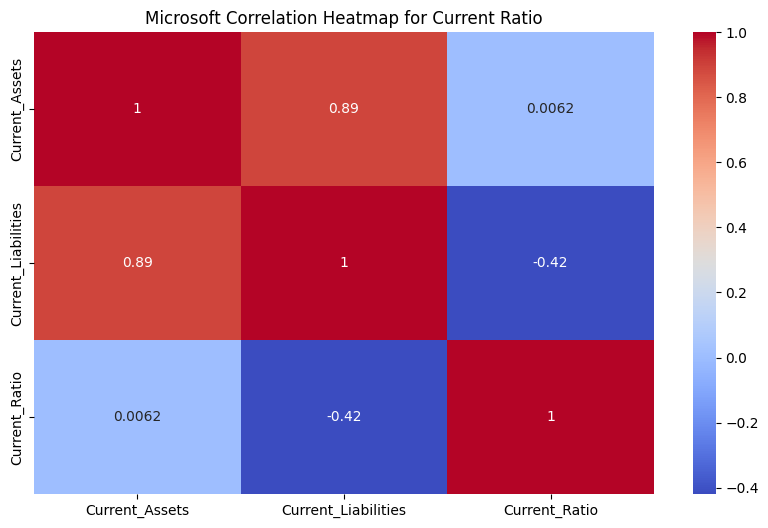

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_df' contains 'assets', 'revenues', and 'asset_turnover_ratio' columns

plt.figure(figsize=(10, 6))
sns.heatmap(merged_df[['Current_Assets', 'Current_Liabilities', 'Current_Ratio']].corr(), annot=True, cmap='coolwarm')
plt.title('Microsoft Correlation Heatmap for Current Ratio')
plt.show()

**Line Graph for Microsoft's Current Ratio over time**

In [ ]:
import plotly.express as px

# Assuming 'merged_df' is your DataFrame and it contains 'filed_x' and 'Current_Ratio' columns
# Make sure 'filed_x' is already converted to datetime

# Creating an interactive line plot using Plotly
fig = px.line(merged_df, x='end_x', y='Current_Ratio', markers=True, title='Microsoft Current Ratio Over Time')
fig.update_xaxes(title_text='Fiscal Years', showgrid=False)  # Remove grid line for x-axis
fig.update_yaxes(title_text='Current Ratio', showgrid=False)  # Remove grid line for y-axis
fig.update_layout(legend_title_text='Metric')
fig.show()


**Stock Price Data Integration using Yfinance**

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

# Assuming your dataset is already loaded into merged_df
# Ensure the 'filingDate' column is in datetime format
merged_df['filingDate'] = pd.to_datetime(merged_df['filed_x'])

# Setting stock price to 0
merged_df['stock_price'] = 0

# Getting stock price with respect to filing Date for all filings
for index, row in merged_df.iterrows():
    # Use the 'filed' date from the DataFrame for each row
    filing_date = row['filingDate']
    ticker_symbol = companyData['ticker'][0]

    # Setting 7 days prior to Filing date
    start_date = filing_date - timedelta(days=7)
    end_date = start_date + timedelta(days=7)

    # Correctly add 7 days to the filing Date

    # Now, convert both start_date and end_date to strings for further processing
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')

    #creating a y finance ticker object
    ticker = yf.Ticker(ticker_symbol)

    historical_data = ticker.history(period='1d', start=start_date_str, end=end_date_str)
    specific_data = historical_data.iloc[0]['Close']

    # Assigning stock price to the respective row
    merged_df.at[index, 'stock_price'] = specific_data

    print(specific_data)

print(merged_df)










19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406


#**Correlation Analysis for Stock Price and Current Ratio**

In [ ]:
import pandas as pd

# Assuming recent_4_filings is your DataFrame and it has 'stock_price' and 'debt_ratio' columns
correlation_matrix = merged_df[['stock_price', 'Current_Ratio']].corr()

print(correlation_matrix)

               stock_price  Current_Ratio
stock_price       1.000000      -0.436297
Current_Ratio    -0.436297       1.000000


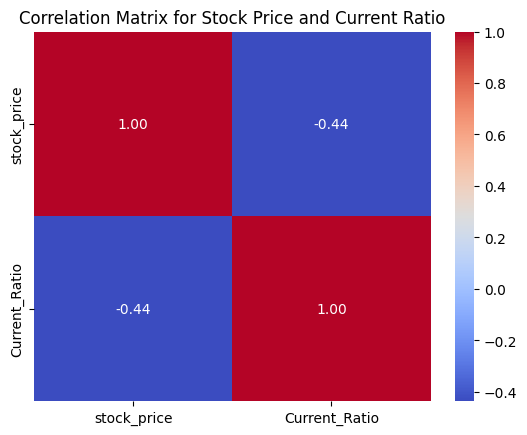

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_matrix is already calculated
#correlation_matrix = recent_4_filings[['stock_price', 'Current_Ratio']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Stock Price and Current Ratio')
plt.show()

Correlation between Current Ratio and Stock Price over Short and Long term

In [ ]:
import plotly.graph_objects as go

# Assuming `merged_df` is a DataFrame and it has 'filingDate', 'debt_ratio', and 'stock_price' columns.

# Create the figure with stock price and debt ratio traces
fig = go.Figure()

# Add Stock Price trace
fig.add_trace(go.Scatter(
    x=merged_df['filingDate'],
    y=merged_df['stock_price'],
    name='Stock Price',
    yaxis='y2'  # This specifies that this trace should use the secondary y-axis
))

# Add Debt Ratio trace
fig.add_trace(go.Scatter(
    x=merged_df['filingDate'],
    y=merged_df['Current_Ratio'],
    name='Current Ratio'
))

# Update layout with no grid lines and add titles
fig.update_layout(
    xaxis=dict(
        title='Fiscal Years',
        showgrid=False  # Removes x-axis grid lines
    ),
    yaxis=dict(
        title='Current Ratio',
        showgrid=False  # Removes y-axis grid lines for the primary y-axis
    ),
    yaxis2=dict(
        title='Stock Price',
        overlaying='y',
        side='right',
        showgrid=False  # Removes y-axis grid lines for the secondary y-axis
    ),
    title='Current Ratio and Stock Price over Time'
)

# Show the figure
fig.show()


**Get Stakeholder Equity Ratio**

In [ ]:
# get company concept data
companyConcept = requests.get(
    (
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}'
     f'/us-gaap/StockholdersEquity.json'
    ),
    headers=headers
    )

# review data
companyConcept.json().keys()
companyConcept.json()['units']

{'USD': [{'end': '2008-06-30',
   'val': 36286000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-07-30',
   'frame': 'CY2008Q2I'},
  {'end': '2008-09-30',
   'val': 33594000000,
   'accn': '0001193125-09-212454',
   'fy': 2010,
   'fp': 'Q1',
   'form': '10-Q',
   'filed': '2009-10-23',
   'frame': 'CY2008Q3I'},
  {'end': '2008-12-31',
   'val': 34478000000,
   'accn': '0001193125-10-015598',
   'fy': 2010,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2010-01-28',
   'frame': 'CY2008Q4I'},
  {'end': '2009-03-31',
   'val': 36943000000,
   'accn': '0001193125-10-090116',
   'fy': 2010,
   'fp': 'Q3',
   'form': '10-Q',
   'filed': '2010-04-22',
   'frame': 'CY2009Q1I'},
  {'end': '2009-06-30',
   'val': 39558000000,
   'accn': '0001193125-09-212454',
   'fy': 2010,
   'fp': 'Q1',
   'form': '10-Q',
   'filed': '2009-10-23'},
  {'end': '2009-06-30',
   'val': 39558000000,
   'accn': '0001193125-10-015598',
   'fy': 2010,
   'fp

In [ ]:
companyConcept.json()['units']
companyConcept.json()['units'].keys()
companyConcept.json()['units']['USD']
companyConcept.json()['units']['USD'][0]

# parse assets from single filing
companyConcept.json()['units']['USD'][0]['val']

StakeholderEquityData = pd.DataFrame.from_dict((
               companyConcept.json()['units']))
StakeholderEquityData

,USD
0,"{'end': '2008-06-30', 'val': 36286000000, 'acc..."
1,"{'end': '2008-09-30', 'val': 33594000000, 'acc..."
2,"{'end': '2008-12-31', 'val': 34478000000, 'acc..."
3,"{'end': '2009-03-31', 'val': 36943000000, 'acc..."
4,"{'end': '2009-06-30', 'val': 39558000000, 'acc..."
...,...
175,"{'end': '2023-06-30', 'val': 206223000000, 'ac..."
176,"{'end': '2023-06-30', 'val': 206223000000, 'ac..."
177,"{'end': '2023-06-30', 'val': 206223000000, 'ac..."
178,"{'end': '2023-09-30', 'val': 220714000000, 'ac..."


In [ ]:
# get all filings data
StakeholderEquityData = pd.DataFrame.from_dict((
               companyConcept.json()['units']['USD']))

# review data
StakeholderEquityData.columns
StakeholderEquityData.form
StakeholderEquityData10K = StakeholderEquityData[StakeholderEquityData.form == '10-K']
StakeholderEquityData10K.dropna()

,end,val,accn,fy,fp,form,filed,frame
0,2008-06-30,36286000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008Q2I
8,2009-06-30,39558000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2009Q2I
20,2010-06-30,46175000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,CY2010Q2I
46,2012-06-30,66363000000,0001193125-14-289961,2014,FY,10-K,2014-07-31,CY2012Q2I
73,2014-06-30,89784000000,0001193125-16-662209,2016,FY,10-K,2016-07-28,CY2014Q2I
86,2015-06-30,80083000000,0001564590-17-014900,2017,FY,10-K,2017-08-02,CY2015Q2I
98,2016-06-30,83090000000,0001564590-18-019062,2018,FY,10-K,2018-08-03,CY2016Q2I
110,2017-06-30,87711000000,0001564590-19-027952,2019,FY,10-K,2019-08-01,CY2017Q2I
122,2018-06-30,82718000000,0001564590-20-034944,2020,FY,10-K,2020-07-31,CY2018Q2I
134,2019-06-30,102330000000,0001564590-21-039151,2021,FY,10-K,2021-07-29,CY2019Q2I


**Microsoft's Stakeholder Equity exploratory analysis**

Statistical Summary for Microsoft:
 count    4.200000e+01
mean     8.859345e+10
std      3.715810e+10
min      3.628600e+10
25%      6.636300e+10
50%      8.140050e+10
75%      1.023300e+11
max      2.062230e+11
Name: val, dtype: float64
Mean Value:
 88593452380.95238
Median Value:
 81400500000.0
Mode Value:
 46175000000


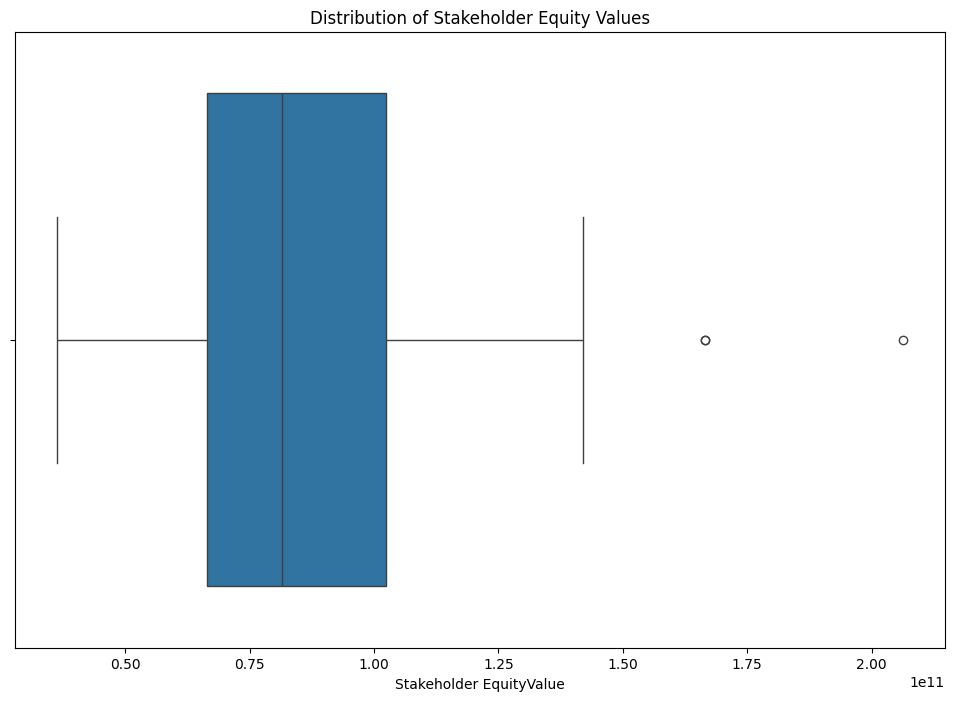

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming CurrentLiabilitiesData10K is your DataFrame and 'val' is a column in it

# Perform statistical summaries for 'val' column
stats_summary = StakeholderEquityData10K['val'].describe()
print("Statistical Summary for Microsoft:\n", stats_summary)

# Calculate mean, median, mode for 'val' column
mean_value = StakeholderEquityData10K['val'].mean()
median_value = StakeholderEquityData10K['val'].median()
mode_value = StakeholderEquityData10K['val'].mode().iloc[0]

print("Mean Value:\n", mean_value)
print("Median Value:\n", median_value)
print("Mode Value:\n", mode_value)

# Visualization - Boxplot for 'val' column
plt.figure(figsize=(12, 8))
sns.boxplot(x=StakeholderEquityData10K['val'])
plt.title('Distribution of Stakeholder Equity Values')
plt.xlabel('Stakeholder EquityValue')
plt.show()


**Line Graph showing Stakeholder Equity of Microsoft over Time**

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming CurrentLiabilitiesData10K is your DataFrame and 'fy' and 'val' are columns in it

# Convert 'val' to dollar format (if you plan to display these formatted values, ensure they're used appropriately)
StakeholderEquityData10K['val_dollar'] = StakeholderEquityData10K['val'].apply(lambda x: f"${x:,.2f}")

# Create an interactive line plot using Plotly
fig = px.line(StakeholderEquityData10K, x='fy', y='val', markers=True, title='Stakeholder Equity of Microsoft over Time')
fig.update_layout(
    xaxis_title='Fiscal Years',
    yaxis_title='Value in $',
    xaxis=dict(tickangle=45, showgrid=False),  # Rotate x-axis labels and remove grid lines
    yaxis=dict(showgrid=False)  # Remove grid lines on the y-axis
)

fig.show()

<ipython-input-91-a0352c47710d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Microsoft's Merged Dataset for Calculating Debt Equity Ratio**

In [ ]:
merged_df=pd.merge(CurrentLiabilitiesData10K, StakeholderEquityData10K, on='accn')
print(merged_df)

         end_x         val_x                  accn  fy_x fp_x form_x  \
0   2009-06-30   27034000000  0001193125-10-171791  2010   FY   10-K   
1   2009-06-30   27034000000  0001193125-10-171791  2010   FY   10-K   
2   2009-06-30   27034000000  0001193125-10-171791  2010   FY   10-K   
3   2010-06-30   26147000000  0001193125-10-171791  2010   FY   10-K   
4   2010-06-30   26147000000  0001193125-10-171791  2010   FY   10-K   
..         ...           ...                   ...   ...  ...    ...   
79  2022-06-30   95082000000  0000950170-23-035122  2023   FY   10-K   
80  2022-06-30   95082000000  0000950170-23-035122  2023   FY   10-K   
81  2023-06-30  104149000000  0000950170-23-035122  2023   FY   10-K   
82  2023-06-30  104149000000  0000950170-23-035122  2023   FY   10-K   
83  2023-06-30  104149000000  0000950170-23-035122  2023   FY   10-K   

       filed_x    frame_x         val_dollar_x       end_y         val_y  \
0   2010-07-30  CY2009Q2I   $27,034,000,000.00  2008-06-30 

#**Calculating Debt Equity Financial Ratio**

In [ ]:
merged_df['Debt_Equity_Ratio'] = merged_df['val_x']/merged_df['val_y']
print(merged_df)
merged_df.dropna()

         end_x         val_x                  accn  fy_x fp_x form_x  \
0   2009-06-30   27034000000  0001193125-10-171791  2010   FY   10-K   
1   2009-06-30   27034000000  0001193125-10-171791  2010   FY   10-K   
2   2009-06-30   27034000000  0001193125-10-171791  2010   FY   10-K   
3   2010-06-30   26147000000  0001193125-10-171791  2010   FY   10-K   
4   2010-06-30   26147000000  0001193125-10-171791  2010   FY   10-K   
..         ...           ...                   ...   ...  ...    ...   
79  2022-06-30   95082000000  0000950170-23-035122  2023   FY   10-K   
80  2022-06-30   95082000000  0000950170-23-035122  2023   FY   10-K   
81  2023-06-30  104149000000  0000950170-23-035122  2023   FY   10-K   
82  2023-06-30  104149000000  0000950170-23-035122  2023   FY   10-K   
83  2023-06-30  104149000000  0000950170-23-035122  2023   FY   10-K   

       filed_x    frame_x         val_dollar_x       end_y         val_y  \
0   2010-07-30  CY2009Q2I   $27,034,000,000.00  2008-06-30 

,end_x,val_x,accn,fy_x,fp_x,form_x,filed_x,frame_x,val_dollar_x,end_y,val_y,fy_y,fp_y,form_y,filed_y,frame_y,val_dollar_y,Debt_Equity_Ratio
0,2009-06-30,27034000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q2I,"$27,034,000,000.00",2008-06-30,36286000000,2010,FY,10-K,2010-07-30,CY2008Q2I,"$36,286,000,000.00",0.745026
6,2010-06-30,26147000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2010Q2I,"$26,147,000,000.00",2009-06-30,39558000000,2011,FY,10-K,2011-07-28,CY2009Q2I,"$39,558,000,000.00",0.660979
12,2011-06-30,28774000000,0001193125-12-316848,2012,FY,10-K,2012-07-26,CY2011Q2I,"$28,774,000,000.00",2010-06-30,46175000000,2012,FY,10-K,2012-07-26,CY2010Q2I,"$46,175,000,000.00",0.623151
24,2013-06-30,37417000000,0001193125-14-289961,2014,FY,10-K,2014-07-31,CY2013Q2I,"$37,417,000,000.00",2012-06-30,66363000000,2014,FY,10-K,2014-07-31,CY2012Q2I,"$66,363,000,000.00",0.563823
36,2015-06-30,49647000000,0001193125-16-662209,2016,FY,10-K,2016-07-28,CY2015Q2I,"$49,647,000,000.00",2014-06-30,89784000000,2016,FY,10-K,2016-07-28,CY2014Q2I,"$89,784,000,000.00",0.552960
42,2016-06-30,59357000000,0001564590-17-014900,2017,FY,10-K,2017-08-02,CY2016Q2I,"$59,357,000,000.00",2015-06-30,80083000000,2017,FY,10-K,2017-08-02,CY2015Q2I,"$80,083,000,000.00",0.741194
48,2017-06-30,55745000000,0001564590-18-019062,2018,FY,10-K,2018-08-03,CY2017Q2I,"$55,745,000,000.00",2016-06-30,83090000000,2018,FY,10-K,2018-08-03,CY2016Q2I,"$83,090,000,000.00",0.670899
54,2018-06-30,58488000000,0001564590-19-027952,2019,FY,10-K,2019-08-01,CY2018Q2I,"$58,488,000,000.00",2017-06-30,87711000000,2019,FY,10-K,2019-08-01,CY2017Q2I,"$87,711,000,000.00",0.666826
60,2019-06-30,69420000000,0001564590-20-034944,2020,FY,10-K,2020-07-31,CY2019Q2I,"$69,420,000,000.00",2018-06-30,82718000000,2020,FY,10-K,2020-07-31,CY2018Q2I,"$82,718,000,000.00",0.839237
66,2020-06-30,72310000000,0001564590-21-039151,2021,FY,10-K,2021-07-29,CY2020Q2I,"$72,310,000,000.00",2019-06-30,102330000000,2021,FY,10-K,2021-07-29,CY2019Q2I,"$102,330,000,000.00",0.706635


**Explanatory data analysis of Merged Datset**

Statistical Summary for Microsoft:
               val_x        fy_x         val_y        fy_y  Debt_Equity_Ratio
count  8.400000e+01    84.00000  8.400000e+01    84.00000          84.000000
mean   5.638893e+10  2016.50000  8.859345e+10  2016.50000           0.642405
std    2.303217e+10     4.05534  3.693358e+10     4.05534           0.116230
min    2.614700e+10  2010.00000  3.628600e+10  2010.00000           0.414066
25%    3.623475e+10  2013.00000  6.636300e+10  2013.00000           0.566259
50%    5.711650e+10  2016.50000  8.140050e+10  2016.50000           0.633557
75%    7.014250e+10  2020.00000  1.023300e+11  2020.00000           0.707287
max    1.041490e+11  2023.00000  2.062230e+11  2023.00000           0.896246
Mean Values:
 val_x                5.638893e+10
fy_x                 2.016500e+03
val_y                8.859345e+10
fy_y                 2.016500e+03
Debt_Equity_Ratio    6.424054e-01
dtype: float64
Median Values:
 val_x                5.711650e+10
fy_x                 2

<ipython-input-94-284f48fbb84b>:11: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-94-284f48fbb84b>:12: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



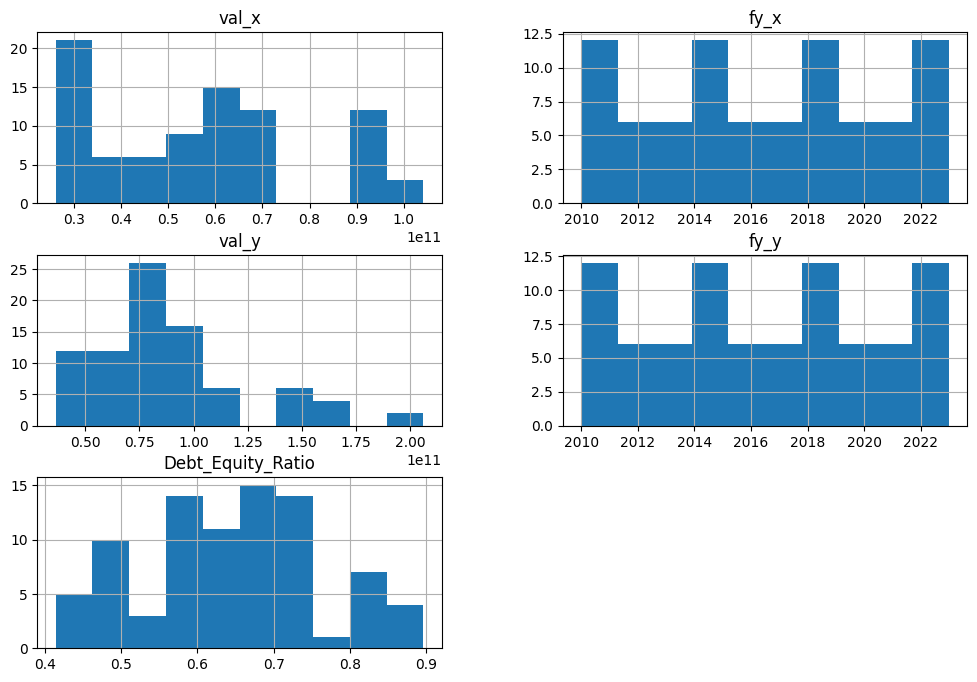

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming assetsData is your DataFrame with financial data

# Perform statistical summaries
stats_summary = merged_df.describe()
print("Statistical Summary for Microsoft:\n", stats_summary)

# Calculate mean, median, mode
mean_values = merged_df.mean()
median_values = merged_df.median()
mode_values = merged_df.mode().iloc[0]

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)

# Visualization - Histograms for distribution
merged_df.hist(figsize=(12, 8))
plt.show()

**Renaming val_x as Liabilities and val_y as Stakeholder Equity**

In [ ]:
merged_df = merged_df.rename(columns={'val_x': 'Liabilities', 'val_y': 'Stakeholder Equity'})
print(merged_df)

         end_x   Liabilities                  accn  fy_x fp_x form_x  \
0   2009-06-30   27034000000  0001193125-10-171791  2010   FY   10-K   
1   2009-06-30   27034000000  0001193125-10-171791  2010   FY   10-K   
2   2009-06-30   27034000000  0001193125-10-171791  2010   FY   10-K   
3   2010-06-30   26147000000  0001193125-10-171791  2010   FY   10-K   
4   2010-06-30   26147000000  0001193125-10-171791  2010   FY   10-K   
..         ...           ...                   ...   ...  ...    ...   
79  2022-06-30   95082000000  0000950170-23-035122  2023   FY   10-K   
80  2022-06-30   95082000000  0000950170-23-035122  2023   FY   10-K   
81  2023-06-30  104149000000  0000950170-23-035122  2023   FY   10-K   
82  2023-06-30  104149000000  0000950170-23-035122  2023   FY   10-K   
83  2023-06-30  104149000000  0000950170-23-035122  2023   FY   10-K   

       filed_x    frame_x         val_dollar_x       end_y  \
0   2010-07-30  CY2009Q2I   $27,034,000,000.00  2008-06-30   
1   2010-07

**Line Graph showing Liabilities and Stakeholder Equity Over Time**

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming merged_df is your DataFrame and it has been appropriately prepared

# Convert 'fy_x' to datetime format
#merged_df['fy_y'] = pd.to_datetime(merged_df['fy_y'])

# Convert DataFrame to long format for easier plotting with Plotly
long_df = pd.melt(merged_df, id_vars=['fy_y'], value_vars=['Liabilities', 'Stakeholder Equity'],
                  var_name='Type', value_name='Value')

# Create an interactive line plot with Plotly Express
fig = px.line(long_df, x='fy_y', y='Value', color='Type', title='Liabilities and Stakeholder Equity Over Time')

# Update layout to remove grid lines and update x-axis title
fig.update_layout(
    xaxis=dict(title='Time Period', showgrid=False),  # Update x-axis title and remove grid line
    yaxis_showgrid=False   # Remove grid line for y-axis
)

fig.show()


**HeatMap for correlation of Debt Equity Ratio**

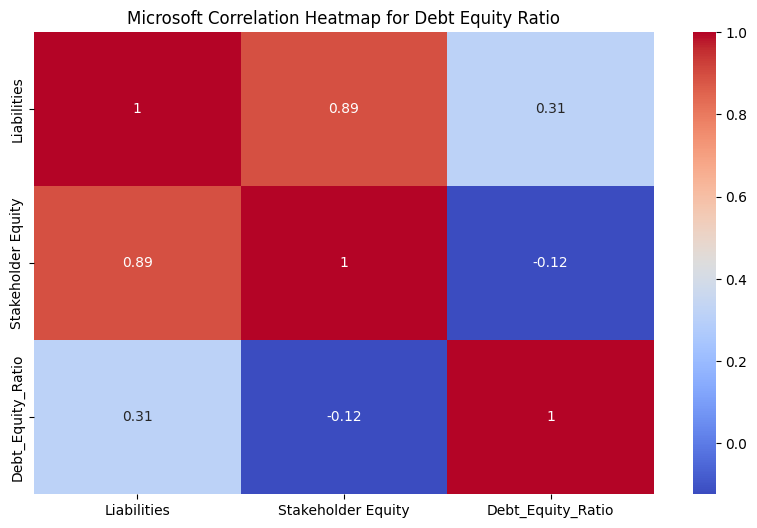

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_df' contains 'assets', 'revenues', and 'asset_turnover_ratio' columns

plt.figure(figsize=(10, 6))
sns.heatmap(merged_df[['Liabilities', 'Stakeholder Equity','Debt_Equity_Ratio']].corr(), annot=True, cmap='coolwarm')
plt.title('Microsoft Correlation Heatmap for Debt Equity Ratio')
plt.show()

**Line Graph showing Debt Equity Ratio over Fiscal Years**

In [ ]:
import plotly.express as px

# Assuming 'merged_df' is your DataFrame and it contains 'filed_x' and 'Current_Ratio' columns
# Make sure 'filed_x' is already converted to datetime

# Creating an interactive line plot using Plotly
fig = px.line(merged_df, x='fy_y', y='Debt_Equity_Ratio', markers=True, title='Microsoft Debt Equity Ratio Over Time')
fig.update_xaxes(title_text='Fiscal Years', showgrid=False)  # Remove grid line for x-axis
fig.update_yaxes(title_text='Debt_Equity_Ratio', showgrid=False)  # Remove grid line for y-axis
fig.update_layout(legend_title_text='Metric')
fig.show()

**Bar Graph illustrating Average Debt Equity Ratio over Time**

In [ ]:
import plotly.express as px
import pandas as pd

# Calculate the average Debt_Equity_Ratio for each fiscal year
average_debt_equity_per_year = merged_df.groupby('fy_y')['Debt_Equity_Ratio'].mean().reset_index()

# Convert Debt_Equity_Ratio to string with 2 decimal places for display
average_debt_equity_per_year['Debt_Equity_Ratio_Text'] = average_debt_equity_per_year['Debt_Equity_Ratio'].apply(lambda x: f"{x:.2f}")

# Create a bar chart
fig = px.bar(average_debt_equity_per_year, x='fy_y', y='Debt_Equity_Ratio',
             title='Average Debt-to-Equity Ratio Over Fiscal Years',
             labels={'fy_y': 'Fiscal Year', 'Debt_Equity_Ratio': 'Average Debt-to-Equity Ratio'},
             text='Debt_Equity_Ratio_Text')  # Display formatted text on the bar

# Update traces to adjust text position
fig.update_traces(textposition='outside')

# Update layout for a cleaner look
fig.update_layout(
    xaxis_title='Fiscal Year',
    yaxis_title='Average Debt-to-Equity Ratio',
    plot_bgcolor='white',  # Set background color to white
    xaxis_showgrid=False,  # Remove grid lines for x-axis
    yaxis_showgrid=False  # Remove grid lines for y-axis
)

# Show the figure
fig.show()

**Stock Price Data Integration Using Yfinance**

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

# Assuming your dataset is already loaded into merged_df
# Ensure the 'filingDate' column is in datetime format
merged_df['filingDate'] = pd.to_datetime(merged_df['filed_x'])

# Setting stock price to 0
merged_df['stock_price'] = 0

# Getting stock price with respect to filing Date for all filings
for index, row in merged_df.iterrows():
    # Use the 'filed' date from the DataFrame for each row
    filing_date = row['filingDate']
    ticker_symbol = companyData['ticker'][0]

    # Setting 7 days prior to Filing date
    start_date = filing_date - timedelta(days=7)
    end_date = start_date + timedelta(days=7)

    # Correctly add 7 days to the filing Date

    # Now, convert both start_date and end_date to strings for further processing
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')

    #creating a y finance ticker object
    ticker = yf.Ticker(ticker_symbol)

    historical_data = ticker.history(period='1d', start=start_date_str, end=end_date_str)
    specific_data = historical_data.iloc[0]['Close']

    # Assigning stock price to the respective row
    merged_df.at[index, 'stock_price'] = specific_data

    print(specific_data)

print(merged_df)








19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406


#**Correlation Analysis for Stock Price and Debt Equity Ratio**

                   stock_price  Debt_Equity_Ratio
stock_price           1.000000           0.153367
Debt_Equity_Ratio     0.153367           1.000000


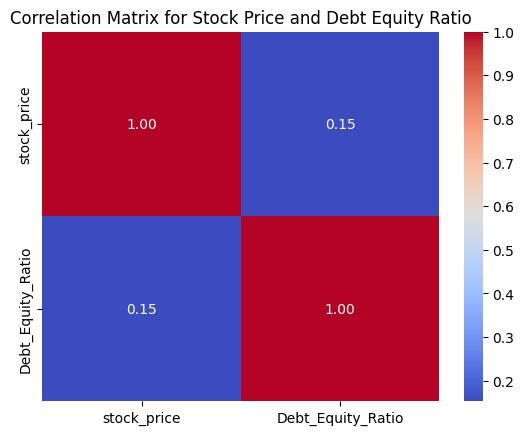

In [ ]:
import pandas as pd

# Assuming recent_4_filings is your DataFrame and it has 'stock_price' and 'debt_ratio' columns
correlation_matrix = merged_df[['stock_price', 'Debt_Equity_Ratio']].corr()

print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_matrix is already calculated
# correlation_matrix = recent_4_filings[['stock_price', 'debt_ratio']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Stock Price and Debt Equity Ratio')
plt.show()


**Long term and Short Term effects of Stock Price and Debt Equity Ratio Over Fiscal Years**

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'merged_df' is your DataFrame and is sorted by 'filingDate'
# Ensure filingDate is in datetime format
merged_df['filingDate'] = pd.to_datetime(merged_df['filingDate'])

# Creating the interactive line plot with Plotly
fig = go.Figure()

# Add debt equity ratio data as a scatter plot with the primary y-axis
fig.add_trace(go.Scatter(
    x=merged_df['filingDate'],
    y=merged_df['Debt_Equity_Ratio'],
    mode='lines+markers',
    name='Debt Equity Ratio',
    yaxis='y1'  # Assign to primary y-axis
))

# Add stock price data as a scatter plot with the secondary y-axis
fig.add_trace(go.Scatter(
    x=merged_df['filingDate'],
    y=merged_df['stock_price'],
    mode='lines+markers',
    name='Stock Price',
    yaxis='y2'  # Assign to secondary y-axis
))

# Update layout to add secondary y-axis with its own scale
fig.update_layout(
    title='Debt Equity Ratio and Stock Price over Time',
    xaxis_title='Fiscal Years',
    yaxis=dict(
        title='Debt Equity Ratio',
        showgrid=False,  # Optionally, turn off the grid for this axis
        side='left'  # Position of the axis
    ),
    yaxis2=dict(
        title='Stock Price Value',
        showgrid=False,  # Optionally, turn off the grid for this axis
        side='right',  # Position of the axis
        overlaying='y',  # Overlay on top of the first y-axis
        anchor='x',  # Anchor the axis to the x-axis
    ),
    legend=dict(x=0.1, y=1.1, orientation='h')  # Position the legend at the top
)

# Show the interactive plot
fig.show()


#**Get Microsoft NetIncome Data**

In [ ]:
# get company concept data
companyConcept = requests.get(
    (
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}'
     f'/us-gaap/NetIncomeLoss.json'
    ),
    headers=headers
    )

# review data
companyConcept.json().keys()
companyConcept.json()['units']

{'USD': [{'start': '2007-07-01',
   'end': '2007-09-30',
   'val': 4289000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-07-30',
   'frame': 'CY2007Q3'},
  {'start': '2007-10-01',
   'end': '2007-12-31',
   'val': 4707000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-07-30',
   'frame': 'CY2007Q4'},
  {'start': '2008-01-01',
   'end': '2008-03-31',
   'val': 4388000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-07-30',
   'frame': 'CY2008Q1'},
  {'start': '2007-07-01',
   'end': '2008-06-30',
   'val': 17681000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-07-30',
   'frame': 'CY2008'},
  {'start': '2008-04-01',
   'end': '2008-06-30',
   'val': 4297000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed'

In [ ]:
companyConcept.json()['units']
companyConcept.json()['units'].keys()
companyConcept.json()['units']['USD']
companyConcept.json()['units']['USD'][0]

# parse assets from single filing
companyConcept.json()['units']['USD'][0]['val']

NetIncomeData = pd.DataFrame.from_dict((
               companyConcept.json()['units']))
NetIncomeData

,USD
0,"{'start': '2007-07-01', 'end': '2007-09-30', '..."
1,"{'start': '2007-10-01', 'end': '2007-12-31', '..."
2,"{'start': '2008-01-01', 'end': '2008-03-31', '..."
3,"{'start': '2007-07-01', 'end': '2008-06-30', '..."
4,"{'start': '2008-04-01', 'end': '2008-06-30', '..."
...,...
299,"{'start': '2023-01-01', 'end': '2023-03-31', '..."
300,"{'start': '2022-07-01', 'end': '2023-06-30', '..."
301,"{'start': '2023-07-01', 'end': '2023-09-30', '..."
302,"{'start': '2023-07-01', 'end': '2023-12-31', '..."


In [ ]:
# get all filings data
NetIncomeData = pd.DataFrame.from_dict((
               companyConcept.json()['units']['USD']))

# review data
NetIncomeData.columns
NetIncomeData.form
NetIncomeData10K = NetIncomeData[NetIncomeData.form == '10-K']
NetIncomeData10K.dropna()

,start,end,val,accn,fy,fp,form,filed,frame
0,2007-07-01,2007-09-30,4289000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2007Q3
1,2007-10-01,2007-12-31,4707000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2007Q4
2,2008-01-01,2008-03-31,4388000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008Q1
3,2007-07-01,2008-06-30,17681000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008
4,2008-04-01,2008-06-30,4297000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008Q2
6,2008-07-01,2008-09-30,4373000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008Q3
9,2008-10-01,2008-12-31,4174000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008Q4
12,2009-01-01,2009-03-31,2977000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q1
14,2008-07-01,2009-06-30,14569000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2009
15,2009-04-01,2009-06-30,3045000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q2


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'GrossProfitData10K' is your DataFrame and it contains 'fy' and 'val' columns

# Aggregate the data to calculate total gross profit for each fiscal year, if needed
agg_df = NetIncomeData10K.groupby('fy')['val'].sum().reset_index()

# Format the 'val' column in 'agg_df' for readability (e.g., converting to billions with two decimal places)
agg_df['formatted_val'] = agg_df['val'].apply(lambda x: "${:,.2f}B".format(x/1e9))

# Create the plot with formatted labels above each bar
fig = px.bar(agg_df, x='fy', y='val', text='formatted_val',
             title='Microsoft Total Net Income by Fiscal Year',
             labels={'fy': 'Fiscal Year', 'val': 'Total Gross Profit ($)'})

# Update the traces to display the formatted text above the bars
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='Fiscal Year',
    yaxis_title='Total Net Income ($)',
    xaxis=dict(type='category', showgrid=False),  # Ensure fiscal years are treated as categorical variables and remove grid lines for x-axis
    yaxis=dict(showgrid=False, automargin=True),  # Remove grid lines for y-axis and ensure automargin
)

# Show the plot
fig.show()


**Merging NetIncome and Stakeholder Equity**

In [ ]:
merged_df=pd.merge(NetIncomeData10K, StakeholderEquityData10K, on='accn')
print(merged_df)

          start       end_x        val_x                  accn  fy_x fp_x  \
0    2007-07-01  2007-09-30   4289000000  0001193125-10-171791  2010   FY   
1    2007-07-01  2007-09-30   4289000000  0001193125-10-171791  2010   FY   
2    2007-07-01  2007-09-30   4289000000  0001193125-10-171791  2010   FY   
3    2007-10-01  2007-12-31   4707000000  0001193125-10-171791  2010   FY   
4    2007-10-01  2007-12-31   4707000000  0001193125-10-171791  2010   FY   
..          ...         ...          ...                   ...   ...  ...   
397  2021-07-01  2022-06-30  72738000000  0000950170-23-035122  2023   FY   
398  2021-07-01  2022-06-30  72738000000  0000950170-23-035122  2023   FY   
399  2022-07-01  2023-06-30  72361000000  0000950170-23-035122  2023   FY   
400  2022-07-01  2023-06-30  72361000000  0000950170-23-035122  2023   FY   
401  2022-07-01  2023-06-30  72361000000  0000950170-23-035122  2023   FY   

    form_x     filed_x   frame_x       end_y         val_y  fy_y fp_y form_

#**Calculating Return on Equity**

In [ ]:
merged_df['Return_on_Equity'] = merged_df['val_x']/merged_df['val_y']
print(merged_df)
merged_df.dropna()

          start       end_x        val_x                  accn  fy_x fp_x  \
0    2007-07-01  2007-09-30   4289000000  0001193125-10-171791  2010   FY   
1    2007-07-01  2007-09-30   4289000000  0001193125-10-171791  2010   FY   
2    2007-07-01  2007-09-30   4289000000  0001193125-10-171791  2010   FY   
3    2007-10-01  2007-12-31   4707000000  0001193125-10-171791  2010   FY   
4    2007-10-01  2007-12-31   4707000000  0001193125-10-171791  2010   FY   
..          ...         ...          ...                   ...   ...  ...   
397  2021-07-01  2022-06-30  72738000000  0000950170-23-035122  2023   FY   
398  2021-07-01  2022-06-30  72738000000  0000950170-23-035122  2023   FY   
399  2022-07-01  2023-06-30  72361000000  0000950170-23-035122  2023   FY   
400  2022-07-01  2023-06-30  72361000000  0000950170-23-035122  2023   FY   
401  2022-07-01  2023-06-30  72361000000  0000950170-23-035122  2023   FY   

    form_x     filed_x   frame_x       end_y         val_y  fy_y fp_y form_

,start,end_x,val_x,accn,fy_x,fp_x,form_x,filed_x,frame_x,end_y,val_y,fy_y,fp_y,form_y,filed_y,frame_y,val_dollar,Return_on_Equity
0,2007-07-01,2007-09-30,4289000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2007Q3,2008-06-30,36286000000,2010,FY,10-K,2010-07-30,CY2008Q2I,"$36,286,000,000.00",0.118200
3,2007-10-01,2007-12-31,4707000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2007Q4,2008-06-30,36286000000,2010,FY,10-K,2010-07-30,CY2008Q2I,"$36,286,000,000.00",0.129719
6,2008-01-01,2008-03-31,4388000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008Q1,2008-06-30,36286000000,2010,FY,10-K,2010-07-30,CY2008Q2I,"$36,286,000,000.00",0.120928
9,2007-07-01,2008-06-30,17681000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008,2008-06-30,36286000000,2010,FY,10-K,2010-07-30,CY2008Q2I,"$36,286,000,000.00",0.487268
12,2008-04-01,2008-06-30,4297000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008Q2,2008-06-30,36286000000,2010,FY,10-K,2010-07-30,CY2008Q2I,"$36,286,000,000.00",0.118420
15,2008-07-01,2008-09-30,4373000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008Q3,2008-06-30,36286000000,2010,FY,10-K,2010-07-30,CY2008Q2I,"$36,286,000,000.00",0.120515
18,2008-10-01,2008-12-31,4174000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008Q4,2008-06-30,36286000000,2010,FY,10-K,2010-07-30,CY2008Q2I,"$36,286,000,000.00",0.115031
21,2009-01-01,2009-03-31,2977000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q1,2008-06-30,36286000000,2010,FY,10-K,2010-07-30,CY2008Q2I,"$36,286,000,000.00",0.082043
27,2009-04-01,2009-06-30,3045000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q2,2008-06-30,36286000000,2010,FY,10-K,2010-07-30,CY2008Q2I,"$36,286,000,000.00",0.083917
45,2008-07-01,2009-06-30,14569000000,0001193125-11-200680,2011,FY,10-K,2011-07-28,CY2009,2009-06-30,39558000000,2011,FY,10-K,2011-07-28,CY2009Q2I,"$39,558,000,000.00",0.368295


In [ ]:
merged_df = merged_df.rename(columns={'val_x': 'NetIncome', 'val_y': 'Stakeholder Equity'})
print(merged_df)

          start       end_x    NetIncome                  accn  fy_x fp_x  \
0    2007-07-01  2007-09-30   4289000000  0001193125-10-171791  2010   FY   
1    2007-07-01  2007-09-30   4289000000  0001193125-10-171791  2010   FY   
2    2007-07-01  2007-09-30   4289000000  0001193125-10-171791  2010   FY   
3    2007-10-01  2007-12-31   4707000000  0001193125-10-171791  2010   FY   
4    2007-10-01  2007-12-31   4707000000  0001193125-10-171791  2010   FY   
..          ...         ...          ...                   ...   ...  ...   
397  2021-07-01  2022-06-30  72738000000  0000950170-23-035122  2023   FY   
398  2021-07-01  2022-06-30  72738000000  0000950170-23-035122  2023   FY   
399  2022-07-01  2023-06-30  72361000000  0000950170-23-035122  2023   FY   
400  2022-07-01  2023-06-30  72361000000  0000950170-23-035122  2023   FY   
401  2022-07-01  2023-06-30  72361000000  0000950170-23-035122  2023   FY   

    form_x     filed_x   frame_x       end_y  Stakeholder Equity  fy_y fp_y

**Exploratory analysis for merged dataset**

Statistical Summary for Microsoft:
           NetIncome         fy_x  Stakeholder Equity         fy_y  \
count  4.020000e+02   402.000000        4.020000e+02   402.000000   
mean   1.282533e+10  2015.320896        7.707607e+10  2015.320896   
std    1.506273e+10     3.611289        2.758687e+10     3.611289   
min   -6.302000e+09  2010.000000        3.628600e+10  2010.000000   
25%    4.902000e+09  2012.000000        5.708300e+10  2012.000000   
50%    6.567000e+09  2015.000000        7.894400e+10  2015.000000   
75%    1.679800e+10  2018.000000        8.771100e+10  2018.000000   
max    7.273800e+10  2023.000000        2.062230e+11  2023.000000   

       Return_on_Equity  
count        402.000000  
mean           0.156244  
std            0.134359  
min           -0.076187  
25%            0.071512  
50%            0.100520  
75%            0.232995  
max            0.614840  
Mean Values:
 NetIncome             1.282533e+10
fy_x                  2.015321e+03
Stakeholder Equity    7.

<ipython-input-110-284f48fbb84b>:11: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-110-284f48fbb84b>:12: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



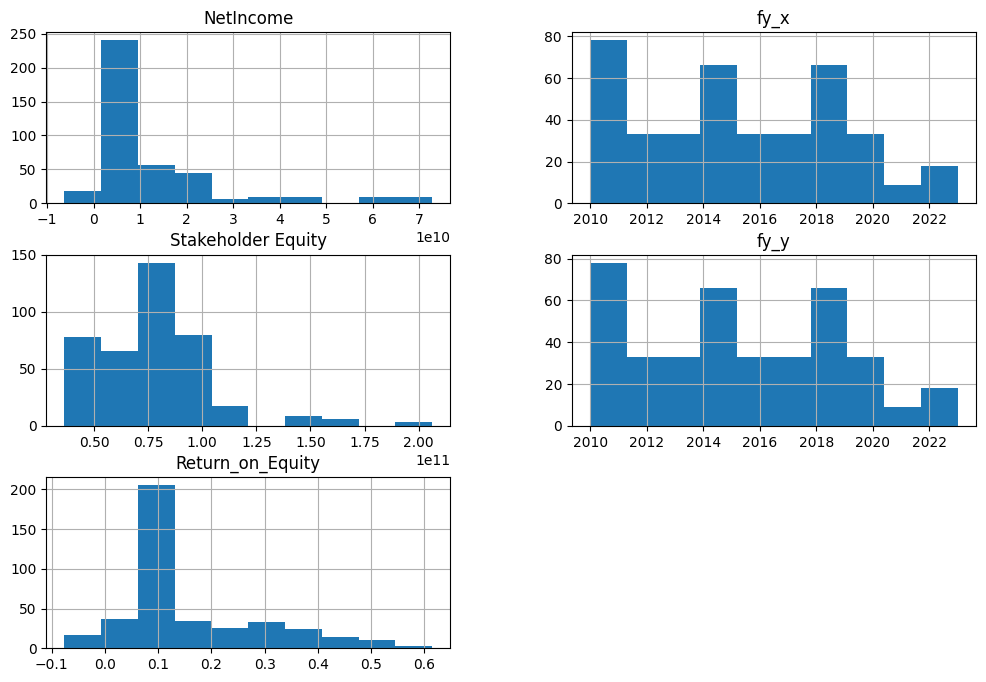

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming assetsData is your DataFrame with financial data

# Perform statistical summaries
stats_summary = merged_df.describe()
print("Statistical Summary for Microsoft:\n", stats_summary)

# Calculate mean, median, mode
mean_values = merged_df.mean()
median_values = merged_df.median()
mode_values = merged_df.mode().iloc[0]

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)

# Visualization - Histograms for distribution
merged_df.hist(figsize=(12, 8))
plt.show()

**Correlation Analysis on Return on Equity Financial Ratio**

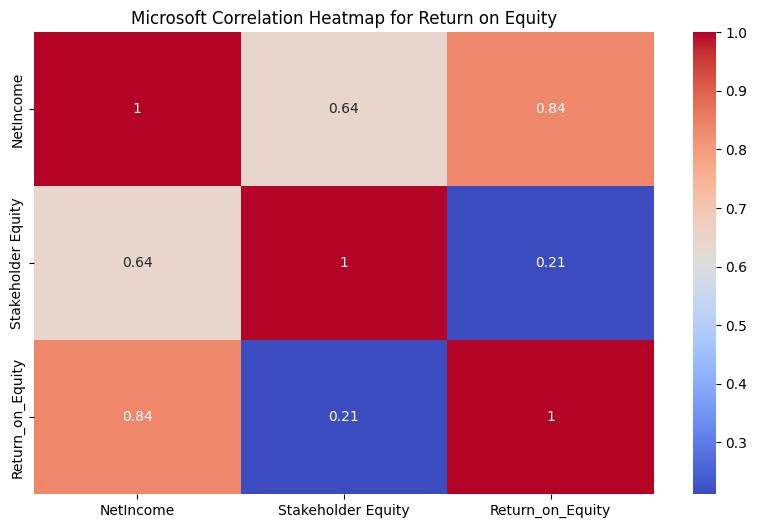

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_df' contains 'assets', 'revenues', and 'asset_turnover_ratio' columns

plt.figure(figsize=(10, 6))
sns.heatmap(merged_df[['NetIncome', 'Stakeholder Equity', 'Return_on_Equity']].corr(), annot=True, cmap='coolwarm')
plt.title('Microsoft Correlation Heatmap for Return on Equity')
plt.show()

**Bar Graph depicting Average Return on Equity Ratio Over fiscal Years**

In [ ]:
import plotly.express as px
import pandas as pd

# Calculate the average Debt_Equity_Ratio for each fiscal year
average_debt_equity_per_year = merged_df.groupby('fy_y')['Return_on_Equity'].mean().reset_index()

# Convert Debt_Equity_Ratio to string with 2 decimal places for display
average_debt_equity_per_year['Return_on_Equity_Text'] = average_debt_equity_per_year['Return_on_Equity'].apply(lambda x: f"{x:.2f}")

# Create a bar chart
fig = px.bar(average_debt_equity_per_year, x='fy_y', y='Return_on_Equity',
             title='Average Return_on_Equity Ratio Over Fiscal Years',
             labels={'fy_y': 'Fiscal Year', 'Debt_Equity_Ratio': 'Average Return_on_Equity Ratio'},
             text='Return_on_Equity_Text')  # Display formatted text on the bar

# Update traces to adjust text position
fig.update_traces(textposition='outside')

# Update layout for a cleaner look
fig.update_layout(
    xaxis_title='Fiscal Year',
    yaxis_title='Average Return_on_Equity Ratio',
    plot_bgcolor='white',  # Set background color to white
    xaxis_showgrid=False,  # Remove grid lines for x-axis
    yaxis_showgrid=False  # Remove grid lines for y-axis
)

# Show the figure
fig.show()

**Stock Price Integration using Yfinance**

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

# Assuming your dataset is already loaded into merged_df
# Ensure the 'filingDate' column is in datetime format
merged_df['filingDate'] = pd.to_datetime(merged_df['filed_x'])

# Setting stock price to 0
merged_df['stock_price'] = 0

# Getting stock price with respect to filing Date for all filings
for index, row in merged_df.iterrows():
    # Use the 'filed' date from the DataFrame for each row
    filing_date = row['filingDate']
    ticker_symbol = companyData['ticker'][0]

    # Setting 7 days prior to Filing date
    start_date = filing_date - timedelta(days=7)
    end_date = start_date + timedelta(days=7)

    # Correctly add 7 days to the filing Date

    # Now, convert both start_date and end_date to strings for further processing
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')

    #creating a y finance ticker object
    ticker = yf.Ticker(ticker_symbol)

    historical_data = ticker.history(period='1d', start=start_date_str, end=end_date_str)
    specific_data = historical_data.iloc[0]['Close']

    # Assigning stock price to the respective row
    merged_df.at[index, 'stock_price'] = specific_data

    print(specific_data)

print(merged_df)




import plotly.express as px

# Ensure 'filingDate' is in datetime format for proper plotting
merged_df['filingDate'] = pd.to_datetime(merged_df['filingDate'])

# Plotting with Plotly Express
fig = px.line(merged_df, x='filingDate', y='stock_price',
              title=f'Stock price vs Fiscal Years for 10-K Filings',
              labels={'filingDate': 'Filing Date', 'stock_price': 'Stock Price'})

# Remove grid lines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()



19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
19.72015953063965
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406
21.206031799316406


#**Correlation Analysis for Stock Price and Return on Equity**

                  stock_price  Return_on_Equity
stock_price          1.000000          0.379493
Return_on_Equity     0.379493          1.000000


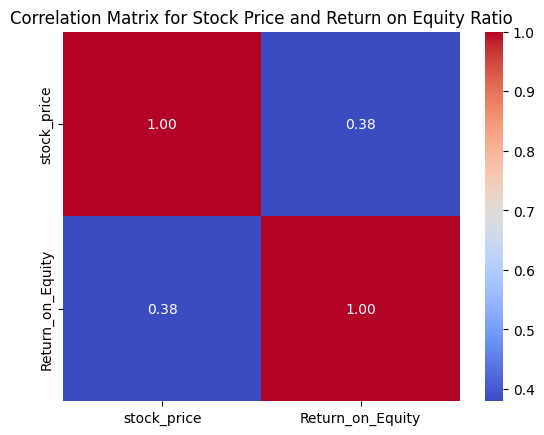

In [ ]:
import pandas as pd

# Assuming recent_4_filings is your DataFrame and it has 'stock_price' and 'debt_ratio' columns
correlation_matrix = merged_df[['stock_price', 'Return_on_Equity']].corr()

print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_matrix is already calculated
# correlation_matrix = recent_4_filings[['stock_price', 'debt_ratio']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Stock Price and Return on Equity Ratio')
plt.show()

**Long Term and Short term effects on Stock Price and Debt Ratio over Fiscal Years**

In [ ]:
import plotly.graph_objects as go

# Assuming `merged_df` has 'filingDate', 'debt_ratio', and 'stock_price' columns.
fig = go.Figure()

# Add Stock Price trace
fig.add_trace(go.Scatter(
    x=merged_df['filingDate'],
    y=merged_df['stock_price'],
    name='Stock Price',
    yaxis='y2'  # This specifies that this trace should use the secondary y-axis
))

# Add Debt Ratio trace
fig.add_trace(go.Scatter(
    x=merged_df['filingDate'],
    y=merged_df['Return_on_Equity'],
    name='Return on Equity Ratio'
))

# Create axis objects and remove gridlines
fig.update_layout(
    xaxis=dict(
        title='Fiscal Years',
        showgrid=False  # This removes the x-axis grid lines
    ),
    yaxis=dict(
        title='Return on Equity Ratio',
        showgrid=False  # This removes the y-axis grid lines for the primary y-axis
    ),
    yaxis2=dict(
        title='Stock Price',
        overlaying='y',
        side='right',
        showgrid=False  # This removes the y-axis grid lines for the secondary y-axis
    ),
    title='Return on Equity Ratio and Stock Price over Time'
)

# Show the figure
fig.show()


#**Get Microsoft's Gross Profit Data**

In [ ]:
# get company concept data
companyConcept = requests.get(
    (
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}'
     f'/us-gaap/GrossProfit.json'
    ),
    headers=headers
    )

# review data
companyConcept.json().keys()
companyConcept.json()['units']

{'USD': [{'start': '2007-07-01',
   'end': '2007-09-30',
   'val': 11087000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-07-30',
   'frame': 'CY2007Q3'},
  {'start': '2007-10-01',
   'end': '2007-12-31',
   'val': 12824000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-07-30',
   'frame': 'CY2007Q4'},
  {'start': '2008-01-01',
   'end': '2008-03-31',
   'val': 11940000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-07-30',
   'frame': 'CY2008Q1'},
  {'start': '2007-07-01',
   'end': '2008-06-30',
   'val': 48822000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-07-30',
   'frame': 'CY2008'},
  {'start': '2008-04-01',
   'end': '2008-06-30',
   'val': 12971000000,
   'accn': '0001193125-10-171791',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'fi

In [ ]:
companyConcept.json()['units']
companyConcept.json()['units'].keys()
companyConcept.json()['units']['USD']
companyConcept.json()['units']['USD'][0]

# parse assets from single filing
companyConcept.json()['units']['USD'][0]['val']

GrossProfitData = pd.DataFrame.from_dict((
               companyConcept.json()['units']))
GrossProfitData

,USD
0,"{'start': '2007-07-01', 'end': '2007-09-30', '..."
1,"{'start': '2007-10-01', 'end': '2007-12-31', '..."
2,"{'start': '2008-01-01', 'end': '2008-03-31', '..."
3,"{'start': '2007-07-01', 'end': '2008-06-30', '..."
4,"{'start': '2008-04-01', 'end': '2008-06-30', '..."
...,...
265,"{'start': '2023-01-01', 'end': '2023-03-31', '..."
266,"{'start': '2022-07-01', 'end': '2023-06-30', '..."
267,"{'start': '2023-07-01', 'end': '2023-09-30', '..."
268,"{'start': '2023-07-01', 'end': '2023-12-31', '..."


In [ ]:
# get all filings data
GrossProfitData = pd.DataFrame.from_dict((
               companyConcept.json()['units']['USD']))

# review data
GrossProfitData.columns
GrossProfitData.form
GrossProfitData10K = GrossProfitData[GrossProfitData.form == '10-K']
GrossProfitData10K.dropna()

,start,end,val,accn,fy,fp,form,filed,frame
0,2007-07-01,2007-09-30,11087000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2007Q3
1,2007-10-01,2007-12-31,12824000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2007Q4
2,2008-01-01,2008-03-31,11940000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008Q1
3,2007-07-01,2008-06-30,48822000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008
4,2008-04-01,2008-06-30,12971000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008Q2
5,2008-07-01,2008-09-30,12213000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008Q3
6,2008-10-01,2008-12-31,12722000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2008Q4
7,2009-01-01,2009-03-31,10834000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q1
8,2008-07-01,2009-06-30,46282000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009
9,2009-04-01,2009-06-30,10513000000,0001193125-10-171791,2010,FY,10-K,2010-07-30,CY2009Q2


**Bar Graph depicting Total Gross Profit**



In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'GrossProfitData10K' is your DataFrame and it contains 'fy' and 'val' columns

# Aggregate the data to calculate total gross profit for each fiscal year, if needed
agg_df = GrossProfitData10K.groupby('fy')['val'].sum().reset_index()

# Format the 'val' column in 'agg_df' for readability (e.g., converting to billions with two decimal places)
agg_df['formatted_val'] = agg_df['val'].apply(lambda x: "${:,.2f}B".format(x/1e9))

# Create the plot with formatted labels above each bar
fig = px.bar(agg_df, x='fy', y='val', text='formatted_val',
             title='Microsoft Total Gross Profit by Fiscal Year',
             labels={'fy': 'Fiscal Year', 'val': 'Total Gross Profit ($)'})

# Update the traces to display the formatted text above the bars
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='Fiscal Year',
    yaxis_title='Total Gross Profit ($)',
    xaxis=dict(type='category', showgrid=False),  # Ensure fiscal years are treated as categorical variables and remove grid lines
    yaxis=dict(showgrid=False, automargin=True)  # Remove grid lines and automatically adjust margin to fit the labels
)

# Show the plot
fig.show()



#**Event Study**

#**Stock Price Evolution before and After Covid for Microsoft from 2020 to 2021**

In [ ]:
#import modules
import requests
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import plotly.express as px

# desired stock symbol
# allows for input of stock symbol and change for testing
stock_symbol = 'MSFT'



# get all companies data
companyTickers = requests.get("https://www.sec.gov/files/company_tickers.json", headers=headers)

#print(companyTickers.json()['0']['cik_str'])

companyCIK = pd.DataFrame.from_dict(companyTickers.json(), orient='index')

print(companyCIK)

companyCIK['cik_str']= companyCIK['cik_str'].astype(str).str.zfill(10)

print(companyCIK)

# create a dataframe of the company information based upon the stock symbol above
company_information = companyCIK[companyCIK['ticker'] == stock_symbol]

print(company_information)

# pull the cik_str from the dataframe
cik = company_information['cik_str'].values[0]

# pull all the sec recent filing data the chosen company
#SEC filling API call
companyFilling = requests.get(f'https://data.sec.gov/submissions/CIK{cik}.json', headers=headers)

print(companyFilling.json()['filings'].keys())

allFilings = pd.DataFrame.from_dict(companyFilling.json()['filings']['recent'])

print(allFilings)

#print all columns for allFilings dataframe
print(allFilings.columns)

filtered_df = allFilings[allFilings['form'] == '10-K']

print(filtered_df)

filtered_df = filtered_df[['accessionNumber', 'reportDate', 'form']]

print(filtered_df)


#fig.show()# define the timeframe for data that we want to look at

stock_symbol = 'MSFT'
start_date = '2020-01-01'
end_date = '2021-12-31'

filtered_df = filtered_df[(filtered_df['reportDate'] >= start_date) & (filtered_df['reportDate'] <= end_date)]

print(filtered_df)


# start the stock integration with yfinance
stock_prices_df = pd.DataFrame()


# step 1: convert reportDate to datetime
filtered_df['reportDate'] = pd.to_datetime(filtered_df['reportDate'])


# set ticker symbol equal to stock_symbol
ticker_symbol = stock_symbol


# write function for getting stock price
def get_stock_price(ticker_symbol, filing_dates):

    prices = {'reportDate': [], '0_days_after': [], '30_days_after': [], '60_days_after': [], '90_days_after': [], '120_days_after': []}

    for filing_date in filing_dates:
        for days_after in [0, 30, 60, 90, 120]:
            target_date = filing_date + timedelta(days=days_after)

            # adjust for weekends
            if target_date.weekday() == 5:
                target_date += timedelta(days=2)
            elif target_date.weekday() == 6:
                target_date += timedelta(days=1)

            try:
                historical_data = yf.download(ticker_symbol, start=target_date.strftime('%Y-%m-%d'), end=(target_date + timedelta(days=1)).strftime('%Y-%m-%d'))
                if not historical_data.empty:
                    price = historical_data['Close'].values[0]

                else:
                    price = None
            except Exception as e:
                print(f'Error fetching data for {ticker_symbol} on {target_date}: {e}')
                price = None

            prices[f'{days_after}_days_after'].append(price)
        prices['reportDate'].append(filing_date)
    return pd.DataFrame(prices)

stock_prices_df = get_stock_price(ticker_symbol, filtered_df['reportDate'])

print(stock_prices_df)

# melt the dataframe to turn on axis for easier graphing
melted_df = pd.melt(stock_prices_df, id_vars=['reportDate'], var_name='Days After', value_name='Stock Price' )

print(melted_df)

import plotly.express as px

# convert days after to strftime in stead of date time
melted_df['Days After'] = melted_df['Days After'].astype(str) + ' days after'

print(melted_df)

fig = px.line(melted_df, x='Days After', y= 'Stock Price',
              title= f'Stock Price Evolution before and After Covid for {stock_symbol} from {start_date} to {end_date}',
              labels={'Days After': 'Period After Filing', 'reportDate': 'Report Date', 'Stock Price': 'Stock Price ($)'})

fig.update_layout(
        xaxis_title='Report Date',
        yaxis_title='Stock Price ($)',
        legend_title='Time After Filing',
         xaxis_showgrid=False,  # This will remove the x-axis gridlines
        yaxis_showgrid=False,  # This will remove the y-axis gridlines

)



       cik_str ticker                              title
0       789019   MSFT                     MICROSOFT CORP
1       320193   AAPL                         Apple Inc.
2      1045810   NVDA                        NVIDIA CORP
3      1018724   AMZN                     AMAZON COM INC
4      1652044  GOOGL                      Alphabet Inc.
...        ...    ...                                ...
10426  1131312  ZNOGW                 ZION OIL & GAS INC
10427  1826681  STRCW  Sarcos Technology & Robotics Corp
10428   884614   UGIC                      UGI CORP /PA/
10429  1923734  RKPPS           Ark7 Properties Plus LLC
10430  1923734  AFTWS           Ark7 Properties Plus LLC

[10431 rows x 3 columns]
          cik_str ticker                              title
0      0000789019   MSFT                     MICROSOFT CORP
1      0000320193   AAPL                         Apple Inc.
2      0001045810   NVDA                        NVIDIA CORP
3      0001018724   AMZN                     AMAZO

[*********************100%%**********************]  1 of 1 completed

           accessionNumber  filingDate  reportDate        acceptanceDateTime  \
0     0001062993-24-005291  2024-03-04  2024-02-29  2024-03-04T18:16:30.000Z   
1     0001062993-24-005290  2024-03-04  2024-02-29  2024-03-04T18:16:15.000Z   
2     0001062993-24-005289  2024-03-04  2024-02-29  2024-03-04T18:15:52.000Z   
3     0001062993-24-005288  2024-03-04  2024-02-29  2024-03-04T18:15:31.000Z   
4     0001062993-24-005287  2024-03-04  2024-02-29  2024-03-04T18:15:27.000Z   
...                    ...         ...         ...                       ...   
1020  0001626431-17-000069  2017-08-31  2017-08-30  2017-08-31T18:12:51.000Z   
1021  0001626431-17-000068  2017-08-31  2017-08-30  2017-08-31T18:11:52.000Z   
1022  0001626431-17-000067  2017-08-31  2017-08-30  2017-08-31T18:10:54.000Z   
1023  0001626431-17-000066  2017-08-31  2017-08-30  2017-08-31T18:10:04.000Z   
1024  0001626431-17-000065  2017-08-31  2017-08-30  2017-08-31T18:09:09.000Z   

     act form fileNumber filmNumber ite


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


  reportDate  0_days_after  30_days_after  60_days_after  90_days_after  \
0 2021-06-30    270.899994     284.910004     303.589996     283.519989   
1 2020-06-30    203.509995     203.899994     225.529999     209.440002   

   120_days_after  
0      324.350006  
1      202.679993  
  reportDate      Days After  Stock Price
0 2021-06-30    0_days_after   270.899994
1 2020-06-30    0_days_after   203.509995
2 2021-06-30   30_days_after   284.910004
3 2020-06-30   30_days_after   203.899994
4 2021-06-30   60_days_after   303.589996
5 2020-06-30   60_days_after   225.529999
6 2021-06-30   90_days_after   283.519989
7 2020-06-30   90_days_after   209.440002
8 2021-06-30  120_days_after   324.350006
9 2020-06-30  120_days_after   202.679993
  reportDate                 Days After  Stock Price
0 2021-06-30    0_days_after days after   270.899994
1 2020-06-30    0_days_after days after   203.509995
2 2021-06-30   30_days_after days after   284.910004
3 2020-06-30   30_days_after days after 

#**Stock Price Effects due to Inflation and Ukraine-Russia War for Microsoft from 2022 to 2023**

In [ ]:
#import modules
import requests
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import plotly.express as px

# desired stock symbol
# allows for input of stock symbol and change for testing
stock_symbol = 'MSFT'



# get all companies data
companyTickers = requests.get("https://www.sec.gov/files/company_tickers.json", headers=headers)

#print(companyTickers.json()['0']['cik_str'])

companyCIK = pd.DataFrame.from_dict(companyTickers.json(), orient='index')

print(companyCIK)

companyCIK['cik_str']= companyCIK['cik_str'].astype(str).str.zfill(10)

print(companyCIK)

# create a dataframe of the company information based upon the stock symbol above
company_information = companyCIK[companyCIK['ticker'] == stock_symbol]

print(company_information)

# pull the cik_str from the dataframe
cik = company_information['cik_str'].values[0]

# pull all the sec recent filing data the chosen company
#SEC filling API call
companyFilling = requests.get(f'https://data.sec.gov/submissions/CIK{cik}.json', headers=headers)

print(companyFilling.json()['filings'].keys())

allFilings = pd.DataFrame.from_dict(companyFilling.json()['filings']['recent'])

print(allFilings)

#print all columns for allFilings dataframe
print(allFilings.columns)

filtered_df = allFilings[allFilings['form'] == '10-K']

print(filtered_df)

filtered_df = filtered_df[['accessionNumber', 'reportDate', 'form']]

print(filtered_df)


#fig.show()# define the timeframe for data that we want to look at

stock_symbol = 'MSFT'
start_date = '2022-06-01'
end_date = '2023-01-01'

filtered_df = filtered_df[(filtered_df['reportDate'] >= start_date) & (filtered_df['reportDate'] <= end_date)]

print(filtered_df)


# start the stock integration with yfinance
stock_prices_df = pd.DataFrame()


# step 1: convert reportDate to datetime
filtered_df['reportDate'] = pd.to_datetime(filtered_df['reportDate'])


# set ticker symbol equal to stock_symbol
ticker_symbol = stock_symbol


# write function for getting stock price
def get_stock_price(ticker_symbol, filing_dates):

    prices = {'reportDate': [], '0_days_after': [], '30_days_after': [], '60_days_after': [], '90_days_after': [], '120_days_after': []}

    for filing_date in filing_dates:
        for days_after in [0, 30, 60, 90, 120]:
            target_date = filing_date + timedelta(days=days_after)

            # adjust for weekends
            if target_date.weekday() == 5:
                target_date += timedelta(days=2)
            elif target_date.weekday() == 6:
                target_date += timedelta(days=1)

            try:
                historical_data = yf.download(ticker_symbol, start=target_date.strftime('%Y-%m-%d'), end=(target_date + timedelta(days=1)).strftime('%Y-%m-%d'))
                if not historical_data.empty:
                    price = historical_data['Close'].values[0]

                else:
                    price = None
            except Exception as e:
                print(f'Error fetching data for {ticker_symbol} on {target_date}: {e}')
                price = None

            prices[f'{days_after}_days_after'].append(price)
        prices['reportDate'].append(filing_date)
    return pd.DataFrame(prices)

stock_prices_df = get_stock_price(ticker_symbol, filtered_df['reportDate'])

print(stock_prices_df)

# melt the dataframe to turn on axis for easier graphing
melted_df = pd.melt(stock_prices_df, id_vars=['reportDate'], var_name='Days After', value_name='Stock Price' )

print(melted_df)

import plotly.express as px

# convert days after to strftime in stead of date time
melted_df['Days After'] = melted_df['Days After'].astype(str) + ' days after'

print(melted_df)

fig = px.line(melted_df, x='Days After', y= 'Stock Price',
              title= f'Stock Price Effects due to Inflation and Ukraine-Russia War for {stock_symbol}  from {start_date} to {end_date}',
              labels={'Days After': 'Period After Filing', 'reportDate': 'Report Date', 'Stock Price': 'Stock Price ($)'})

fig.update_layout(
        xaxis_title='Report Date',
        yaxis_title='Stock Price ($)',
        legend_title='Time After Filing',
        xaxis_showgrid=False,  # This will remove the x-axis gridlines
    yaxis_showgrid=False,  # This will remove the y-axis gridlines

)



       cik_str ticker                              title
0       789019   MSFT                     MICROSOFT CORP
1       320193   AAPL                         Apple Inc.
2      1045810   NVDA                        NVIDIA CORP
3      1018724   AMZN                     AMAZON COM INC
4      1652044  GOOGL                      Alphabet Inc.
...        ...    ...                                ...
10426  1131312  ZNOGW                 ZION OIL & GAS INC
10427  1826681  STRCW  Sarcos Technology & Robotics Corp
10428   884614   UGIC                      UGI CORP /PA/
10429  1923734  RKPPS           Ark7 Properties Plus LLC
10430  1923734  AFTWS           Ark7 Properties Plus LLC

[10431 rows x 3 columns]
          cik_str ticker                              title
0      0000789019   MSFT                     MICROSOFT CORP
1      0000320193   AAPL                         Apple Inc.
2      0001045810   NVDA                        NVIDIA CORP
3      0001018724   AMZN                     AMAZO

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


  reportDate  0_days_after  30_days_after  60_days_after  90_days_after  \
0 2022-06-30    256.829987      278.01001     265.230011     241.070007   

   120_days_after  
0      235.869995  
  reportDate      Days After  Stock Price
0 2022-06-30    0_days_after   256.829987
1 2022-06-30   30_days_after   278.010010
2 2022-06-30   60_days_after   265.230011
3 2022-06-30   90_days_after   241.070007
4 2022-06-30  120_days_after   235.869995
  reportDate                 Days After  Stock Price
0 2022-06-30    0_days_after days after   256.829987
1 2022-06-30   30_days_after days after   278.010010
2 2022-06-30   60_days_after days after   265.230011
3 2022-06-30   90_days_after days after   241.070007
4 2022-06-30  120_days_after days after   235.869995


#**Stock Price Effects based on Build Announcement and AI Upgrade for Microsoft from 2023 to 2024**

In [ ]:
#import modules
import requests
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import plotly.express as px

# desired stock symbol
# allows for input of stock symbol and change for testing
stock_symbol = 'MSFT'



# get all companies data
companyTickers = requests.get("https://www.sec.gov/files/company_tickers.json", headers=headers)

#print(companyTickers.json()['0']['cik_str'])

companyCIK = pd.DataFrame.from_dict(companyTickers.json(), orient='index')

print(companyCIK)

companyCIK['cik_str']= companyCIK['cik_str'].astype(str).str.zfill(10)

print(companyCIK)

# create a dataframe of the company information based upon the stock symbol above
company_information = companyCIK[companyCIK['ticker'] == stock_symbol]

print(company_information)

# pull the cik_str from the dataframe
cik = company_information['cik_str'].values[0]

# pull all the sec recent filing data the chosen company
#SEC filling API call
companyFilling = requests.get(f'https://data.sec.gov/submissions/CIK{cik}.json', headers=headers)

print(companyFilling.json()['filings'].keys())

allFilings = pd.DataFrame.from_dict(companyFilling.json()['filings']['recent'])

print(allFilings)

#print all columns for allFilings dataframe
print(allFilings.columns)

filtered_df = allFilings[allFilings['form'] == '10-K']

print(filtered_df)

filtered_df = filtered_df[['accessionNumber', 'reportDate', 'form']]

print(filtered_df)


#fig.show()# define the timeframe for data that we want to look at

stock_symbol = 'MSFT'
start_date = '2023-01-01'
end_date = '2024-02-01'

filtered_df = filtered_df[(filtered_df['reportDate'] >= start_date) & (filtered_df['reportDate'] <= end_date)]

print(filtered_df)


# start the stock integration with yfinance
stock_prices_df = pd.DataFrame()


# step 1: convert reportDate to datetime
filtered_df['reportDate'] = pd.to_datetime(filtered_df['reportDate'])


# set ticker symbol equal to stock_symbol
ticker_symbol = stock_symbol


# write function for getting stock price
def get_stock_price(ticker_symbol, filing_dates):

    prices = {'reportDate': [], '0_days_after': [], '30_days_after': [], '60_days_after': [], '90_days_after': [], '120_days_after': []}

    for filing_date in filing_dates:
        for days_after in [0, 30, 60, 90, 120]:
            target_date = filing_date + timedelta(days=days_after)

            # adjust for weekends
            if target_date.weekday() == 5:
                target_date += timedelta(days=2)
            elif target_date.weekday() == 6:
                target_date += timedelta(days=1)

            try:
                historical_data = yf.download(ticker_symbol, start=target_date.strftime('%Y-%m-%d'), end=(target_date + timedelta(days=1)).strftime('%Y-%m-%d'))
                if not historical_data.empty:
                    price = historical_data['Close'].values[0]

                else:
                    price = None
            except Exception as e:
                print(f'Error fetching data for {ticker_symbol} on {target_date}: {e}')
                price = None

            prices[f'{days_after}_days_after'].append(price)
        prices['reportDate'].append(filing_date)
    return pd.DataFrame(prices)

stock_prices_df = get_stock_price(ticker_symbol, filtered_df['reportDate'])

print(stock_prices_df)

# melt the dataframe to turn on axis for easier graphing
melted_df = pd.melt(stock_prices_df, id_vars=['reportDate'], var_name='Days After', value_name='Stock Price' )

print(melted_df)

import plotly.express as px

# convert days after to strftime in stead of date time
melted_df['Days After'] = melted_df['Days After'].astype(str) + ' days after'

print(melted_df)

fig = px.line(melted_df, x='Days After', y= 'Stock Price',
              title= f'Stock Price Effects based on Build Announcement and AI Upgrade for {stock_symbol}  from {start_date} to {end_date}',
              labels={'Days After': 'Period After Filing', 'reportDate': 'Report Date', 'Stock Price': 'Stock Price ($)'})

fig.update_layout(
        xaxis_title='Report Date',
        yaxis_title='Stock Price ($)',
        legend_title='Time After Filing',
        xaxis_showgrid=False,  # This will remove the x-axis gridlines
    yaxis_showgrid=False,  # This will remove the y-axis gridlines

)



       cik_str   ticker                              title
0       789019     MSFT                     MICROSOFT CORP
1       320193     AAPL                         Apple Inc.
2      1045810     NVDA                        NVIDIA CORP
3      1018724     AMZN                     AMAZON COM INC
4      1652044    GOOGL                      Alphabet Inc.
...        ...      ...                                ...
10487  1805385    EVLVW  Evolv Technologies Holdings, Inc.
10488  1834974   LEV-WT                   Lion Electric Co
10489  1834974  LEV-WTA                   Lion Electric Co
10490  1923734    RKPPS           Ark7 Properties Plus LLC
10491  1923734    AFTWS           Ark7 Properties Plus LLC

[10492 rows x 3 columns]
          cik_str   ticker                              title
0      0000789019     MSFT                     MICROSOFT CORP
1      0000320193     AAPL                         Apple Inc.
2      0001045810     NVDA                        NVIDIA CORP
3      0001018724 

[*********************100%%**********************]  1 of 1 completed

dict_keys(['recent', 'files'])
           accessionNumber  filingDate  reportDate        acceptanceDateTime  \
0     0001062993-24-005291  2024-03-04  2024-02-29  2024-03-04T18:16:30.000Z   
1     0001062993-24-005290  2024-03-04  2024-02-29  2024-03-04T18:16:15.000Z   
2     0001062993-24-005289  2024-03-04  2024-02-29  2024-03-04T18:15:52.000Z   
3     0001062993-24-005288  2024-03-04  2024-02-29  2024-03-04T18:15:31.000Z   
4     0001062993-24-005287  2024-03-04  2024-02-29  2024-03-04T18:15:27.000Z   
...                    ...         ...         ...                       ...   
1020  0001626431-17-000069  2017-08-31  2017-08-30  2017-08-31T18:12:51.000Z   
1021  0001626431-17-000068  2017-08-31  2017-08-30  2017-08-31T18:11:52.000Z   
1022  0001626431-17-000067  2017-08-31  2017-08-30  2017-08-31T18:10:54.000Z   
1023  0001626431-17-000066  2017-08-31  2017-08-30  2017-08-31T18:10:04.000Z   
1024  0001626431-17-000065  2017-08-31  2017-08-30  2017-08-31T18:09:09.000Z   

     act


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

  reportDate  0_days_after  30_days_after  60_days_after  90_days_after  \
0 2023-06-30    340.540009     335.920013     328.410004     313.640015   

   120_days_after  
0      337.309998  
  reportDate      Days After  Stock Price
0 2023-06-30    0_days_after   340.540009
1 2023-06-30   30_days_after   335.920013
2 2023-06-30   60_days_after   328.410004
3 2023-06-30   90_days_after   313.640015
4 2023-06-30  120_days_after   337.309998
  reportDate                 Days After  Stock Price
0 2023-06-30    0_days_after days after   340.540009
1 2023-06-30   30_days_after days after   335.920013
2 2023-06-30   60_days_after days after   328.410004
3 2023-06-30   90_days_after days after   313.640015
4 2023-06-30  120_days_after days after   337.309998
